## 1. Data Preprocessing

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn

data = pd.read_csv('data.csv', index_col = 0)
y = data['X65']
X = data.drop(['X65'], axis=1)


In [2]:
from sklearn import preprocessing

# Interpolate missing vales
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X)
X = imp.transform(X)
X = pd.DataFrame(X)


In [3]:
#Data Description
from scipy.stats import describe

#Data Preview
display(X[1:4])

#Full data descriptive statistics
pd.DataFrame(X).describe()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.00000,4.1486,3.2732,107.350,3.4000,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.69484,4.9909,3.9510,134.270,2.7185,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.00000,4.5746,3.6147,86.435,4.2228,5.5497


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,...,4.340500e+04,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.993833,5.842209,5.438928,294.978029,6.118020e+04,7.200663,5.712548,505.346176,62.926207,14.669245,...,7.005229e+04,5.320062e+03,13.672969,5.329289e+03,122.094599,3.153355e+04,552.399187,1.390628e+05,123.985521,2347.072100
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003434,0.269010,0.021540,1.050800,-4.949000e+01,0.000000,0.005783,0.431070,1.018500,0.295530,...,2.757300e+01,8.959000e-03,0.014632,8.755400e-01,0.000000,5.729400e+00,4.515600,4.220500e+01,3.100200,2.207800
50%,0.049636,0.471940,0.196580,1.574000,-1.184000e+00,0.000000,0.059653,1.074100,1.195500,0.505990,...,1.088400e+03,5.270100e-02,0.119650,9.511200e-01,0.006389,1.040000e+01,6.649500,7.153500e+01,5.102900,4.389200
75%,0.129560,0.688270,0.403260,2.806000,5.046100e+01,0.089441,0.150810,2.639100,2.063000,0.709090,...,4.993700e+03,1.287800e-01,0.284570,9.928000e-01,0.236280,2.389000e+01,10.443000,1.177400e+02,8.650900,10.461000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


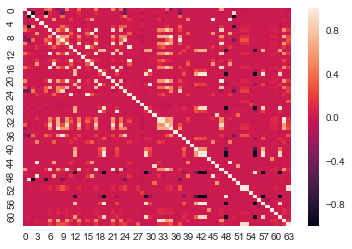

In [5]:
##Correlation map
import seaborn as sns; sns.set()
sns.heatmap(pd.DataFrame(X).corr())

## 2. Base Model - Benchmark

In [6]:
# Fit base model, parameter search

#Scale Data, split 60/20/20
from sklearn.model_selection import train_test_split
X0 = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X0, y, test_size = 0.2, random_state = 23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 23) 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Do GridSearchCV to determine parameters
parameters = {'max_depth':[12,18,24,30],'min_samples_leaf':[10,18,26,34,42,50],
            'class_weight':[{0: 1., 1: 1.},
                            {0: 1., 1: 20.},
                            {0: 1., 1: 30.},
                            {0: 1., 1: 40.},
                            {0: 1., 1: 50.}]}

model = RandomForestClassifier(random_state = 23)
scorer = make_scorer(roc_auc_score) #AUC scoring
grid_obj = GridSearchCV(model, parameters, scoring=scorer, verbose=1, cv=3)


grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_val_predictions = best_clf.predict(X_val)

print('The training ROC AUC Score is', roc_auc_score(best_train_predictions, y_train))
print('The validation ROC AUC Score is', roc_auc_score(best_val_predictions, y_val))

# Let's also explore what parameters ended up being used in the new model.
best_clf


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  8.8min finished


The training ROC AUC Score is 0.6293266230185585
The validation ROC AUC Score is 0.5993803471284129


RandomForestClassifier(bootstrap=True, class_weight={0: 1.0, 1: 50.0},
            criterion='gini', max_depth=24, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=42,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=23,
            verbose=0, warm_start=False)

In [7]:
#Display verbose output
grid_obj.cv_results_

D:\Coding\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Coding\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Coding\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Coding\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: 

{'mean_fit_time': array([1.65575933, 1.53961531, 1.72866488, 1.50357938, 1.47852182,
        1.25756232, 1.86437551, 1.89105884, 1.56599649, 1.746689  ,
        1.58990852, 1.55954893, 1.93564208, 1.86150861, 1.56223369,
        1.45100768, 1.42980377, 1.51629337, 1.59364613, 1.46436954,
        1.45605334, 1.3909591 , 1.31679217, 1.3855137 , 1.38522871,
        1.31423863, 1.17244959, 1.09915813, 1.22675951, 1.22799412,
        1.33692543, 1.17890366, 1.17205977, 1.22020594, 1.39236132,
        1.15045079, 1.40125593, 1.37232629, 1.42575153, 1.42919143,
        1.29419963, 1.45073883, 1.72908537, 1.42399152, 1.20319684,
        1.23166768, 1.20650403, 2.31813264, 2.03139997, 1.48341155,
        1.44995983, 1.43676416, 1.32097077, 1.75645566, 1.72817262,
        1.29190707, 1.26178416, 1.19846209, 1.48473509, 1.30458434,
        2.30234051, 1.37119937, 1.32877811, 1.29091485, 1.22786776,
        1.20357299, 1.62231064, 1.26305103, 1.6002361 , 1.27475015,
        1.22024592, 1.14684542,

In [8]:
#Function for measuring performance
from sklearn import metrics

#y_train, y_val are target train/val (or test) vectors
#y_train_pred, y_val_pred are predicted train/val (or test) vectors
#vtype = 1 if prediction vector is more than one column of probabilities
#vtype = 2 if prediction vector is one column of probabilities

# Recall and precision stats, along with confusion mat are based on
# 50th percentile acceptance threshold

def perf_metrics(y_train, y_val, y_train_pred, y_val_pred, vtype): 
# Making predictions
    if(vtype == 1):
        y_train_pred = y_train_pred[:,1]
        y_val_pred = y_val_pred[:,1]
    if(vtype == 2):
        y_train_pred = y_train_pred[:,] 
        y_val_pred = y_val_pred[:,] 
        
        
    train_accuracy = roc_auc_score(y_train, y_train_pred)
    val_accuracy = roc_auc_score(y_val, y_val_pred)
    print('The training accuracy is', train_accuracy)
    print('The validation accuracy is', val_accuracy)

    
    train_mat = metrics.confusion_matrix(y_train,y_train_pred > 0.5)
    val_mat = metrics.confusion_matrix(y_val,y_val_pred > 0.5)
    print("Training Set Confusion Mat.:")
    print(train_mat)
    print("Precision: ", train_mat[1][1]/(train_mat[0][1]+train_mat[1][1]))
    print("Recall: ", train_mat[1][1]/(train_mat[1][0]+train_mat[1][1]))

    print("Valid Set Confusion Mat.:")
    print(val_mat)
    print("Precision: ", val_mat[1][1]/(val_mat[0][1]+val_mat[1][1]))
    print("Recall: ", val_mat[1][1]/(val_mat[1][0]+val_mat[1][1]))

In [9]:
#Measure Performance of Base Model

class_weight = {0: 1.0, 1: 50.0}
model = RandomForestClassifier(max_depth=24, min_samples_leaf=42, min_samples_split=2, class_weight = class_weight)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)


The training accuracy is 0.9151621758654759
The validation accuracy is 0.7981988380634697
Training Set Confusion Mat.:
[[21339  3467]
 [   37  1200]]
Precision:  0.257124491107778
Recall:  0.9700889248181084
Valid Set Confusion Mat.:
[[7053 1205]
 [ 109  314]]
Precision:  0.20671494404213298
Recall:  0.7423167848699763


[49, 29, 14, 39, 32, 58, 27, 17, 7, 43, 6, 16, 52, 2, 42, 61, 62, 10, 13, 56, 36, 30, 59, 22, 60, 3, 31, 55, 20, 53, 0, 1, 54, 47, 21, 46, 50, 51, 44, 19, 35, 9, 63, 57, 28, 8, 40, 34, 48, 4, 24, 38, 41, 11, 18, 5, 15, 37, 45, 33, 23, 12, 25, 26]
[0.003 0.004 0.004 0.004 0.004 0.005 0.005 0.005 0.006 0.006 0.006 0.006
 0.006 0.006 0.006 0.006 0.006 0.006 0.007 0.007 0.007 0.008 0.008 0.008
 0.008 0.008 0.008 0.008 0.008 0.009 0.009 0.009 0.009 0.01  0.01  0.01
 0.01  0.01  0.011 0.011 0.011 0.012 0.012 0.013 0.013 0.013 0.014 0.015
 0.016 0.018 0.019 0.02  0.022 0.026 0.026 0.028 0.03  0.031 0.033 0.043
 0.048 0.049 0.066 0.136]


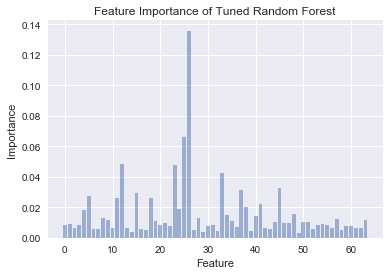

In [10]:
#Visualize Feature Importance
import matplotlib.pyplot as plt
%matplotlib inline

objects = ('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
          'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
          'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48',
          'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64')
y_pos = np.arange(len(objects))
plt.bar(y_pos, model.feature_importances_, align='center', alpha=0.5)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance of Tuned Random Forest')

#important features: 
print(sorted(range(len(model.feature_importances_)), key=lambda k: model.feature_importances_[k]))
print(np.round(np.sort(model.feature_importances_),3))

## 2.1 PCA

PCA Explained Variance is quite low, so no PCA will be used.

In [11]:
import visuals as vs
from sklearn.decomposition import PCA

#Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=40)
pca.fit(X0)
print(pca.explained_variance_)
print(np.sum(pca.explained_variance_))



[9.79414746 8.81241902 4.83342383 4.67726878 3.27716161 3.08908343
 2.77527864 2.492677   2.23993046 1.77848461 1.51127596 1.22313769
 1.19200325 1.13004969 1.03810709 1.00314963 1.0004075  1.00001409
 0.99800436 0.99094144 0.96027382 0.95205015 0.92003566 0.80111412
 0.77638035 0.66694294 0.66251014 0.6466528  0.62058589 0.47114766
 0.38738519 0.25774557 0.17024031 0.14574545 0.12730505 0.09402322
 0.0920836  0.075643   0.06087903 0.05843403]
63.80414354380271


## 2.2 Outlier Testing

### Function for removal of outliers

In [12]:
# Outlier Removal Function
# Input: X and y vectors, p is the probability cutoff (e.g. 5 for 5/95th percentile)
# Returns outlier removed X and y, as well as outlier count.
def outlier_remove(X, y, p):
    
    outlier_count = []
    outliers = [] #For troubleshooting
    for feature in X.keys():
    
        # Calculate pth percentile of the data for the given feature
        Q1 = np.percentile(X[feature],p)
    
        # Calculate 1-pth percentile of the data for the given feature
        Q2 = np.percentile(X[feature],100-p)
    
    
        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q2-Q1)*1.5
    
        # Display the outliers
        #print("Data points considered outliers for the feature '{}':".format(feature)) #For troubleshooting
        #display(X[~((data[feature] >= Q1 - step) & (X[feature] <= Q2 + step))]) #For troubleshooting
        outliers = np.append(outliers, np.where(~((X[feature] >= Q1 - step) & (X[feature] <= Q2 + step))))
        outlier_count = np.append(outlier_count, len(np.where(~((X[feature] >= Q1 - step) & (X[feature] <= Q2 + step)))[0]))
    
    outliers = outliers.astype(int)

    #Remove outliers
    good_X = X.drop(X.index[outliers]).reset_index(drop = True)
    y = y.drop(X.index[outliers]).reset_index(drop = True)

    #Scale variables
    good_X = preprocessing.scale(good_X)
    
    return good_X, y, outlier_count

We can assess the impact of outlier removal by re-fitting the base model on each of the outlier-removed datasets. Note that all datasets perform similarly but better than the full dataset base model, therefore we can exclude the minimum amount of data possible to boost performance

In [13]:
# Remove outliers
X1, y1, _ = outlier_remove(X, y, 5)
X2, y2, _ = outlier_remove(X, y, 2.5)
X3, y3, _ = outlier_remove(X, y, 1)
X4, y4, _ = outlier_remove(X, y, 0.5)

#5% outliers
print("")
print("New size:", len(y1))
print("Bankrupt ratio:", np.sum(y1)/len(y1))
## Sample Data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 23) 
## Fit Model
class_weight = {0: 1.0, 1: 50.0}
model = RandomForestClassifier(max_depth=24, min_samples_leaf=42, min_samples_split=2, class_weight = class_weight, random_state = 23)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
## Examine Results
print("Metrics: 5% Outlier Criteria")
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)

#2.5% outliers
print("")
print("New size:", len(y2))
print("Bankrupt ratio:", np.sum(y2)/len(y2))
## Sample Data 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 23) 
## Fit Model
class_weight = {0: 1.0, 1: 50.0}
model = RandomForestClassifier(max_depth=24, min_samples_leaf=42, min_samples_split=2, class_weight = class_weight, random_state = 23)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
## Examine Results
print("Metrics: 2.5% Outlier Criteria")
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)

#1% outliers
print("")
print("New size:", len(y3))
print("Bankrupt ratio:", np.sum(y3)/len(y3))
## Sample Data
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, random_state = 23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 23) 
## Fit Model
class_weight = {0: 1.0, 1: 50.0}
model = RandomForestClassifier(max_depth=24, min_samples_leaf=42, min_samples_split=2, class_weight = class_weight, random_state = 23)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
## Examine Results
print("Metrics: 1% Outlier Criteria")
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)

#0.5% outliers
print("")
print("New size:", len(y4))
print("Bankrupt ratio:", np.sum(y4)/len(y4))
## Sample Data
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.2, random_state = 23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 23) 
## Fit Model
class_weight = {0: 1.0, 1: 50.0}
model = RandomForestClassifier(max_depth=24, min_samples_leaf=42, min_samples_split=2, class_weight = class_weight, random_state = 23)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
## Examine Results
print("Metrics: 0.5% Outlier Criteria")
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)



New size: 31242
Bankrupt ratio: 0.04362716855515012
Metrics: 5% Outlier Criteria
The training accuracy is 0.9251843331269195
The validation accuracy is 0.8119394779273564
Training Set Confusion Mat.:
[[15790  2121]
 [   26   807]]
Precision:  0.27561475409836067
Recall:  0.9687875150060024
Valid Set Confusion Mat.:
[[5210  758]
 [  70  211]]
Precision:  0.21775025799793601
Recall:  0.7508896797153025

New size: 36120
Bankrupt ratio: 0.04496124031007752
Metrics: 2.5% Outlier Criteria
The training accuracy is 0.9284986058425613
The validation accuracy is 0.8231927631405438
Training Set Confusion Mat.:
[[18295  2406]
 [   26   945]]
Precision:  0.2820053715308863
Recall:  0.9732234809474768
Valid Set Confusion Mat.:
[[6023  871]
 [  75  255]]
Precision:  0.22646536412078153
Recall:  0.7727272727272727

New size: 39895
Bankrupt ratio: 0.04654718636420604
Metrics: 1% Outlier Criteria
The training accuracy is 0.9176490142101494
The validation accuracy is 0.8429682992994395
Training Set Conf

## 3. Model Exploration

For this section, all models will be fit with the same subset of test data excluded, but occasionally with different train/validation splits.

In [14]:
from sklearn.model_selection import train_test_split
X_processed, y_processed, _ = outlier_remove(X, y, 0.5) #Remove outliers and scale data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size = 0.2, random_state = 23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 23) 

### 3.1 SVM

In [15]:
from sklearn import svm
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib #joblib allows easy save/reload of models

Linear SVM model:

In [16]:
class_weight = {0: 1.0, 1: 25.0} #Balanced class weights
clf = svm.LinearSVC(C=1, class_weight = class_weight, random_state = 23)
clf.fit(X_train, y_train)

#Store model
joblib.dump(clf, 'SVM_models/linear_model.pkl') 

['SVM_models/linear_model.pkl']

In [17]:
#Load model
clf = joblib.load('SVM_models/linear_model.pkl')
#Predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
#Metrics
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)

The training accuracy is 0.7318863004694676
The validation accuracy is 0.7496065989847717
Training Set Confusion Mat.:
[[19886  3795]
 [  435   722]]
Precision:  0.15984060216958157
Recall:  0.6240276577355229
Valid Set Confusion Mat.:
[[6613 1267]
 [ 136  264]]
Precision:  0.17243631613324625
Recall:  0.66


Polynomial Kernel parameter tuning. Note that max iterations are lowered since an approximation should be sufficient to determine best parameter set. This may take more than an hour to run, so output is included in the paper appendix.

In [176]:
## Warning:
## This code block may take very long to run,
## Results are included in report appendix to save time.

parameters = {'C':[1,5,10,15], 'degree':[1,5,10], 'gamma':[0.5,2**-3,2**-5,2**-7]}

class_weight = {0: 1.0, 1: 25.0}
model =svm.SVC(random_state = 23, class_weight=class_weight, kernel='poly', max_iter = 40000, tol=0.01)
scorer = make_scorer(roc_auc_score)
class_weight = {0: 1.0, 1: 25.0}
grid_obj = GridSearchCV(model, parameters, scoring=scorer, verbose=2, cv=3)


grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_val_predictions = best_clf.predict(X_val)

print('The training ROC AUC Score is', roc_auc_score(best_train_predictions, y_train))
print('The validation ROC AUC Score is', roc_auc_score(best_val_predictions, y_val))

# Let's also explore what parameters ended up being used in the new model.
best_clf

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1, degree=1, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=1, degree=1, gamma=0.5, total=  19.8s
[CV] C=1, degree=1, gamma=0.5 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.2s remaining:    0.0s
D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=1, degree=1, gamma=0.5, total=  14.2s
[CV] C=1, degree=1, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=1, degree=1, gamma=0.5, total=  14.2s
[CV] C=1, degree=1, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=1, degree=1, gamma=0.125, total=  41.9s
[CV] C=1, degree=1, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=1, degree=1, gamma=0.125, total=  41.7s
[CV] C=1, degree=1, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=1, degree=1, gamma=0.125, total=  42.5s
[CV] C=1, degree=1, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=1, degree=1, gamma=0.03125, total=  43.4s
[CV] C=1, degree=1, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=1, degree=1, gamma=0.03125, total=  43.4s
[CV] C=1, degree=1, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=1, degree=1, gamma=0.03125, total=  43.4s
[CV] C=1, degree=1, gamma=0.0078125 ..................................
[CV] ................... C=1, degree=1, gamma=0.0078125, total=  42.3s
[CV] C=1, degree=1, gamma=0.0078125 ..................................
[CV] ................... C=1, degree=1, gamma=0.0078125, total=  44.1s
[CV] C=1, degree=1, gamma=0.0078125 ..................................
[CV] ................... C=1, degree=1, gamma=0.0078125, total=  44.5s
[CV] C=1, degree=5, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=1, degree=5, gamma=0.5, total=  10.7s
[CV] C=1, degree=5, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=1, degree=5, gamma=0.5, total=  10.9s
[CV] C=1, degree=5, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=1, degree=5, gamma=0.5, total=  10.1s
[CV] C=1, degree=5, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=1, degree=5, gamma=0.125, total=  11.8s
[CV] C=1, degree=5, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=1, degree=5, gamma=0.125, total=  13.9s
[CV] C=1, degree=5, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=1, degree=5, gamma=0.125, total=  11.6s
[CV] C=1, degree=5, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=1, degree=5, gamma=0.03125, total=  39.7s
[CV] C=1, degree=5, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=1, degree=5, gamma=0.03125, total=  38.4s
[CV] C=1, degree=5, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=1, degree=5, gamma=0.03125, total=  38.4s
[CV] C=1, degree=5, gamma=0.0078125 ..................................
[CV] ................... C=1, degree=5, gamma=0.0078125, total=  52.7s
[CV] C=1, degree=5, gamma=0.0078125 ..................................
[CV] ................... C=1, degree=5, gamma=0.0078125, total=  49.5s
[CV] C=1, degree=5, gamma=0.0078125 ..................................
[CV] ................... C=1, degree=5, gamma=0.0078125, total=  49.0s
[CV] C=1, degree=10, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=1, degree=10, gamma=0.5, total=   7.2s
[CV] C=1, degree=10, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=1, degree=10, gamma=0.5, total=   7.8s
[CV] C=1, degree=10, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=1, degree=10, gamma=0.5, total=   7.1s
[CV] C=1, degree=10, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=1, degree=10, gamma=0.125, total=   8.5s
[CV] C=1, degree=10, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=1, degree=10, gamma=0.125, total=   9.6s
[CV] C=1, degree=10, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=1, degree=10, gamma=0.125, total=  10.3s
[CV] C=1, degree=10, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=1, degree=10, gamma=0.03125, total=  34.0s
[CV] C=1, degree=10, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=1, degree=10, gamma=0.03125, total=  33.8s
[CV] C=1, degree=10, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=1, degree=10, gamma=0.03125, total=  33.8s
[CV] C=1, degree=10, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=1, degree=10, gamma=0.0078125, total=  48.2s
[CV] C=1, degree=10, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=1, degree=10, gamma=0.0078125, total=  49.6s
[CV] C=1, degree=10, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=1, degree=10, gamma=0.0078125, total=  49.0s
[CV] C=5, degree=1, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=5, degree=1, gamma=0.5, total=   5.9s
[CV] C=5, degree=1, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=5, degree=1, gamma=0.5, total=   5.7s
[CV] C=5, degree=1, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=5, degree=1, gamma=0.5, total=   5.6s
[CV] C=5, degree=1, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=5, degree=1, gamma=0.125, total=  10.5s
[CV] C=5, degree=1, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=5, degree=1, gamma=0.125, total=  10.4s
[CV] C=5, degree=1, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=5, degree=1, gamma=0.125, total=  10.7s
[CV] C=5, degree=1, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=5, degree=1, gamma=0.03125, total=  35.4s
[CV] C=5, degree=1, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=5, degree=1, gamma=0.03125, total=  36.1s
[CV] C=5, degree=1, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=5, degree=1, gamma=0.03125, total=  37.4s
[CV] C=5, degree=1, gamma=0.0078125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=5, degree=1, gamma=0.0078125, total=  36.4s
[CV] C=5, degree=1, gamma=0.0078125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=5, degree=1, gamma=0.0078125, total=  37.8s
[CV] C=5, degree=1, gamma=0.0078125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=5, degree=1, gamma=0.0078125, total=  37.2s
[CV] C=5, degree=5, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=5, degree=5, gamma=0.5, total=   9.3s
[CV] C=5, degree=5, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=5, degree=5, gamma=0.5, total=  10.0s
[CV] C=5, degree=5, gamma=0.5 ........................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ......................... C=5, degree=5, gamma=0.5, total=   8.9s
[CV] C=5, degree=5, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=5, degree=5, gamma=0.125, total=   9.4s
[CV] C=5, degree=5, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=5, degree=5, gamma=0.125, total=  10.4s
[CV] C=5, degree=5, gamma=0.125 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=5, degree=5, gamma=0.125, total=   9.4s
[CV] C=5, degree=5, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=5, degree=5, gamma=0.03125, total=  25.7s
[CV] C=5, degree=5, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=5, degree=5, gamma=0.03125, total=  27.1s
[CV] C=5, degree=5, gamma=0.03125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=5, degree=5, gamma=0.03125, total=  26.5s
[CV] C=5, degree=5, gamma=0.0078125 ..................................
[CV] ................... C=5, degree=5, gamma=0.0078125, total=  47.1s
[CV] C=5, degree=5, gamma=0.0078125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=5, degree=5, gamma=0.0078125, total=  47.8s
[CV] C=5, degree=5, gamma=0.0078125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=5, degree=5, gamma=0.0078125, total=  47.3s
[CV] C=5, degree=10, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=5, degree=10, gamma=0.5, total=   7.2s
[CV] C=5, degree=10, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=5, degree=10, gamma=0.5, total=   7.9s
[CV] C=5, degree=10, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=5, degree=10, gamma=0.5, total=   6.8s
[CV] C=5, degree=10, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=5, degree=10, gamma=0.125, total=   7.4s
[CV] C=5, degree=10, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=5, degree=10, gamma=0.125, total=   7.9s
[CV] C=5, degree=10, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=5, degree=10, gamma=0.125, total=   7.0s
[CV] C=5, degree=10, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=5, degree=10, gamma=0.03125, total=  29.8s
[CV] C=5, degree=10, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=5, degree=10, gamma=0.03125, total=  29.8s
[CV] C=5, degree=10, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=5, degree=10, gamma=0.03125, total=  29.2s
[CV] C=5, degree=10, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=5, degree=10, gamma=0.0078125, total=  47.4s
[CV] C=5, degree=10, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=5, degree=10, gamma=0.0078125, total=  48.3s
[CV] C=5, degree=10, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=5, degree=10, gamma=0.0078125, total=  48.4s
[CV] C=10, degree=1, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=10, degree=1, gamma=0.5, total=   5.7s
[CV] C=10, degree=1, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=10, degree=1, gamma=0.5, total=   5.3s
[CV] C=10, degree=1, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=10, degree=1, gamma=0.5, total=   5.2s
[CV] C=10, degree=1, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=10, degree=1, gamma=0.125, total=   6.9s
[CV] C=10, degree=1, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=10, degree=1, gamma=0.125, total=   6.9s
[CV] C=10, degree=1, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=10, degree=1, gamma=0.125, total=   6.8s
[CV] C=10, degree=1, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=10, degree=1, gamma=0.03125, total=  25.2s
[CV] C=10, degree=1, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=10, degree=1, gamma=0.03125, total=  26.4s
[CV] C=10, degree=1, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=10, degree=1, gamma=0.03125, total=  26.1s
[CV] C=10, degree=1, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, degree=1, gamma=0.0078125, total=  37.6s
[CV] C=10, degree=1, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, degree=1, gamma=0.0078125, total=  38.2s
[CV] C=10, degree=1, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, degree=1, gamma=0.0078125, total=  37.2s
[CV] C=10, degree=5, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=10, degree=5, gamma=0.5, total=   9.3s
[CV] C=10, degree=5, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=10, degree=5, gamma=0.5, total=   9.8s
[CV] C=10, degree=5, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=10, degree=5, gamma=0.5, total=   8.9s
[CV] C=10, degree=5, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=10, degree=5, gamma=0.125, total=   9.2s
[CV] C=10, degree=5, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=10, degree=5, gamma=0.125, total=  10.5s
[CV] C=10, degree=5, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=10, degree=5, gamma=0.125, total=   9.0s
[CV] C=10, degree=5, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=10, degree=5, gamma=0.03125, total=  25.5s
[CV] C=10, degree=5, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=10, degree=5, gamma=0.03125, total=  24.4s
[CV] C=10, degree=5, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=10, degree=5, gamma=0.03125, total=  24.1s
[CV] C=10, degree=5, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, degree=5, gamma=0.0078125, total=  45.8s
[CV] C=10, degree=5, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, degree=5, gamma=0.0078125, total=  46.4s
[CV] C=10, degree=5, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=10, degree=5, gamma=0.0078125, total=  47.1s
[CV] C=10, degree=10, gamma=0.5 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=10, degree=10, gamma=0.5, total=   7.6s
[CV] C=10, degree=10, gamma=0.5 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=10, degree=10, gamma=0.5, total=   8.4s
[CV] C=10, degree=10, gamma=0.5 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=10, degree=10, gamma=0.5, total=   6.7s
[CV] C=10, degree=10, gamma=0.125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=10, degree=10, gamma=0.125, total=   8.1s
[CV] C=10, degree=10, gamma=0.125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=10, degree=10, gamma=0.125, total=   7.9s
[CV] C=10, degree=10, gamma=0.125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=10, degree=10, gamma=0.125, total=   7.8s
[CV] C=10, degree=10, gamma=0.03125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=10, degree=10, gamma=0.03125, total=  28.7s
[CV] C=10, degree=10, gamma=0.03125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=10, degree=10, gamma=0.03125, total=  29.0s
[CV] C=10, degree=10, gamma=0.03125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=10, degree=10, gamma=0.03125, total=  28.6s
[CV] C=10, degree=10, gamma=0.0078125 ................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=10, degree=10, gamma=0.0078125, total=  46.8s
[CV] C=10, degree=10, gamma=0.0078125 ................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=10, degree=10, gamma=0.0078125, total=  48.4s
[CV] C=10, degree=10, gamma=0.0078125 ................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=10, degree=10, gamma=0.0078125, total=  47.6s
[CV] C=15, degree=1, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=15, degree=1, gamma=0.5, total=   5.7s
[CV] C=15, degree=1, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=15, degree=1, gamma=0.5, total=   5.2s
[CV] C=15, degree=1, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=15, degree=1, gamma=0.5, total=   5.6s
[CV] C=15, degree=1, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=15, degree=1, gamma=0.125, total=   6.1s
[CV] C=15, degree=1, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=15, degree=1, gamma=0.125, total=   6.0s
[CV] C=15, degree=1, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=15, degree=1, gamma=0.125, total=   6.0s
[CV] C=15, degree=1, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=15, degree=1, gamma=0.03125, total=  14.5s
[CV] C=15, degree=1, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=15, degree=1, gamma=0.03125, total=  14.8s
[CV] C=15, degree=1, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=15, degree=1, gamma=0.03125, total=  15.2s
[CV] C=15, degree=1, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=15, degree=1, gamma=0.0078125, total=  36.7s
[CV] C=15, degree=1, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=15, degree=1, gamma=0.0078125, total=  37.2s
[CV] C=15, degree=1, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=15, degree=1, gamma=0.0078125, total=  38.4s
[CV] C=15, degree=5, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=15, degree=5, gamma=0.5, total=   9.5s
[CV] C=15, degree=5, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=15, degree=5, gamma=0.5, total=   9.8s
[CV] C=15, degree=5, gamma=0.5 .......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ........................ C=15, degree=5, gamma=0.5, total=   9.2s
[CV] C=15, degree=5, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=15, degree=5, gamma=0.125, total=   9.3s
[CV] C=15, degree=5, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=15, degree=5, gamma=0.125, total=  10.0s
[CV] C=15, degree=5, gamma=0.125 .....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ...................... C=15, degree=5, gamma=0.125, total=   9.5s
[CV] C=15, degree=5, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=15, degree=5, gamma=0.03125, total=  22.6s
[CV] C=15, degree=5, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=15, degree=5, gamma=0.03125, total=  24.0s
[CV] C=15, degree=5, gamma=0.03125 ...................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................... C=15, degree=5, gamma=0.03125, total=  23.3s
[CV] C=15, degree=5, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=15, degree=5, gamma=0.0078125, total=  45.1s
[CV] C=15, degree=5, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=15, degree=5, gamma=0.0078125, total=  45.1s
[CV] C=15, degree=5, gamma=0.0078125 .................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] .................. C=15, degree=5, gamma=0.0078125, total=  45.6s
[CV] C=15, degree=10, gamma=0.5 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=15, degree=10, gamma=0.5, total=   7.4s
[CV] C=15, degree=10, gamma=0.5 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=15, degree=10, gamma=0.5, total=   8.0s
[CV] C=15, degree=10, gamma=0.5 ......................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ....................... C=15, degree=10, gamma=0.5, total=   6.7s
[CV] C=15, degree=10, gamma=0.125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=15, degree=10, gamma=0.125, total=   7.3s
[CV] C=15, degree=10, gamma=0.125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=15, degree=10, gamma=0.125, total=   8.2s
[CV] C=15, degree=10, gamma=0.125 ....................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ..................... C=15, degree=10, gamma=0.125, total=   8.7s
[CV] C=15, degree=10, gamma=0.03125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=15, degree=10, gamma=0.03125, total=  29.8s
[CV] C=15, degree=10, gamma=0.03125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=15, degree=10, gamma=0.03125, total=  29.2s
[CV] C=15, degree=10, gamma=0.03125 ..................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................... C=15, degree=10, gamma=0.03125, total=  29.4s
[CV] C=15, degree=10, gamma=0.0078125 ................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=15, degree=10, gamma=0.0078125, total=  48.1s
[CV] C=15, degree=10, gamma=0.0078125 ................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=15, degree=10, gamma=0.0078125, total=  49.1s
[CV] C=15, degree=10, gamma=0.0078125 ................................


D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV] ................. C=15, degree=10, gamma=0.0078125, total=  48.0s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 79.8min finished
D:\Coding\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


The training ROC AUC Score is 0.5755363078755019
The validation ROC AUC Score is 0.5810086837578496


SVC(C=10, cache_size=200, class_weight={0: 1.0, 1: 25.0}, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.0078125, kernel='poly',
  max_iter=40000, probability=False, random_state=23, shrinking=True,
  tol=0.01, verbose=False)

Polynomial kernel model:

In [18]:
class_weight = {0: 1.0, 1: 25.0}
clf = svm.SVC(C=10, class_weight = class_weight, kernel = 'poly', gamma = 2**-5, degree = 1, random_state = 23)
clf.fit(X_train, y_train)

#Store model
joblib.dump(clf, 'SVM_models/poly_model.pkl') 

['SVM_models/poly_model.pkl']

In [19]:
#Load Model
clf = joblib.load('SVM_models/poly_model.pkl')
#Predict
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
#Metrics
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)

The training accuracy is 0.8048452243568605
The validation accuracy is 0.8131916243654823
Training Set Confusion Mat.:
[[18593  5088]
 [  203   954]]
Precision:  0.15789473684210525
Recall:  0.8245462402765773
Valid Set Confusion Mat.:
[[6177 1703]
 [  63  337]]
Precision:  0.16519607843137254
Recall:  0.8425


RBF Kernel parameter tuning (output included in report).

In [ ]:
## Warning:
## This code block may take very long to run,
## Results are included in report appendix to save time.

parameters = {'C':[0.5,2,8,32,128,512,2048,4096], 'gamma':[0.5,2**-3,2**-5,2**-7, 2**-9, 2**-11, 2**-13, 2**-15]}

class_weight = {0: 1.0, 1: 25.0}
model =svm.SVC(random_state = 23, class_weight=class_weight, kernel='poly', max_iter = 100000, tol=0.01)
scorer = make_scorer(roc_auc_score)
class_weight = {0: 1.0, 1: 25.0}
grid_obj = GridSearchCV(model, parameters, scoring=scorer, verbose=3, cv=3)


grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_val_predictions = best_clf.predict(X_val)

print('The training ROC AUC Score is', roc_auc_score(best_train_predictions, y_train))
print('The validation ROC AUC Score is', roc_auc_score(best_val_predictions, y_val))

# Let's also explore what parameters ended up being used in the new model.
best_clf

RBF kernel model:

In [20]:
class_weight = {0: 1.0, 1: 25.0}
clf = svm.SVC(C=2048, class_weight = class_weight, kernel = 'rbf', gamma = 2**-11 , random_state = 23)
clf.fit(X_train, y_train)

#Store model
joblib.dump(clf, 'SVM_models/rbf_model.pkl') 

['SVM_models/rbf_model.pkl']

In [21]:
#Load model
clf = joblib.load('SVM_models/rbf_model.pkl')
#Predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
#Metrics
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)

The training accuracy is 0.9343442479861521
The validation accuracy is 0.8582296954314721
Training Set Confusion Mat.:
[[21779  1902]
 [   59  1098]]
Precision:  0.366
Recall:  0.9490060501296457
Valid Set Confusion Mat.:
[[7202  678]
 [  79  321]]
Precision:  0.3213213213213213
Recall:  0.8025


### 3.2 Neural Network

In [22]:
import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

D:\Coding\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [23]:
#One-hot encode target
y_train_NN = np.array(keras.utils.to_categorical(y_train, 2))
y_val_NN = np.array(keras.utils.to_categorical(y_val, 2))
y_test_NN = np.array(keras.utils.to_categorical(y_test, 2))

Single Layer Model:

In [24]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape=(64,)))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 8,578
Trainable params: 8,578
Non-trainable params: 0
_________________________________________________________________


In [25]:

class_weight = {0: 1., 1: 25.}
model.fit(X_train, y_train_NN, validation_data=(X_val, y_val_NN), epochs=100,  batch_size=100, class_weight = class_weight, verbose=1)
model.save('NN_models/single_layer.h5')

Train on 24838 samples, validate on 8280 samples
Epoch 1/100
24838/24838 [==============================] - 7s 295us/step - loss: 1.2555 - acc: 0.6131 - val_loss: 0.6377 - val_acc: 0.6762
Epoch 2/100
24838/24838 [==============================] - 2s 75us/step - loss: 1.1153 - acc: 0.6986 - val_loss: 0.6078 - val_acc: 0.6812
Epoch 3/100
24838/24838 [==============================] - 2s 70us/step - loss: 1.0543 - acc: 0.7198 - val_loss: 0.5866 - val_acc: 0.7178
Epoch 4/100
24838/24838 [==============================] - 2s 69us/step - loss: 0.9899 - acc: 0.7478 - val_loss: 0.4840 - val_acc: 0.7806
Epoch 5/100
24838/24838 [==============================] - 2s 73us/step - loss: 0.9464 - acc: 0.7679 - val_loss: 0.4546 - val_acc: 0.8036
Epoch 6/100
24838/24838 [==============================] - 2s 69us/step - loss: 0.8980 - acc: 0.7897 - val_loss: 0.4909 - val_acc: 0.7911
Epoch 7/100
24838/24838 [==============================] - 2s 73us/step - loss: 0.8433 - acc: 0.8014 - val_loss: 0.4892 - 

In [26]:
#Load model
model = load_model('NN_models/single_layer.h5')
#Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
#Metrics
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 1)

The training accuracy is 0.9970641175342806
The validation accuracy is 0.93127538071066
Training Set Confusion Mat.:
[[23000   681]
 [    3  1154]]
Precision:  0.6288828337874659
Recall:  0.9974070872947277
Valid Set Confusion Mat.:
[[7539  341]
 [  95  305]]
Precision:  0.47213622291021673
Recall:  0.7625


Deep Model:

In [27]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(64,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total para

In [28]:
class_weight = {0: 1., 1: 25.}
model.fit(X_train, y_train_NN, validation_data=(X_val, y_val_NN), epochs=100,  batch_size=100, class_weight = class_weight, verbose=1)
model.save('NN_models/deep_layer.h5')

Train on 24838 samples, validate on 8280 samples
Epoch 1/100
24838/24838 [==============================] - 4s 155us/step - loss: 1.2658 - acc: 0.5914 - val_loss: 0.6041 - val_acc: 0.6739
Epoch 2/100
24838/24838 [==============================] - 3s 117us/step - loss: 1.1127 - acc: 0.6718 - val_loss: 0.5311 - val_acc: 0.7734
Epoch 3/100
24838/24838 [==============================] - 3s 110us/step - loss: 0.9597 - acc: 0.7432 - val_loss: 0.5027 - val_acc: 0.7502
Epoch 4/100
24838/24838 [==============================] - 3s 114us/step - loss: 0.8698 - acc: 0.7646 - val_loss: 0.3142 - val_acc: 0.8396
Epoch 5/100
24838/24838 [==============================] - 3s 108us/step - loss: 0.8270 - acc: 0.7781 - val_loss: 0.4121 - val_acc: 0.7946
Epoch 6/100
24838/24838 [==============================] - 4s 160us/step - loss: 0.7606 - acc: 0.7877 - val_loss: 0.3655 - val_acc: 0.8122
Epoch 7/100
24838/24838 [==============================] - 3s 111us/step - loss: 0.7547 - acc: 0.8005 - val_loss: 0.3

In [29]:
#Load model
model = load_model('NN_models/deep_layer.h5')
#Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
#Metrics
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 1)

The training accuracy is 0.9973145653895736
The validation accuracy is 0.9583550126903551
Training Set Confusion Mat.:
[[22942   739]
 [    3  1154]]
Precision:  0.6096143687268886
Recall:  0.9974070872947277
Valid Set Confusion Mat.:
[[7549  331]
 [  78  322]]
Precision:  0.49310872894333846
Recall:  0.805


Bagged Model:

In [30]:
#Fit 24 simultaenous single layer models

for i in range(1,25):
    #Resample subsample of training data
    X_train_temp, X_val_temp, y_train_temp, y_val_temp = train_test_split(X_train, y_train, test_size = 0.25, random_state = 23+i)
    y_train_temp = np.array(keras.utils.to_categorical(y_train_temp, 2))
    y_val_temp = np.array(keras.utils.to_categorical(y_val_temp, 2))
    
    #Model parameters same as above single layer model
    model = Sequential()
    model.add(Dense(128, activation = 'relu', input_shape=(64,)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    class_weight = {0: 1., 1: 25.}
    print("Fitting model #", i, "...")
    model.fit(X_train_temp, y_train_temp, validation_data=(X_val_temp, y_val_temp), epochs=100, batch_size=100, class_weight = class_weight, verbose=1)
    print("Saving model...")
    #Save model sequentially
    model.save('NN_models/NN_single{0}.h5'.format(i))
    

Fitting model # 1 ...
Train on 18628 samples, validate on 6210 samples
Epoch 1/100
18628/18628 [==============================] - 2s 98us/step - loss: 1.2814 - acc: 0.5901 - val_loss: 0.7447 - val_acc: 0.5847
Epoch 2/100
18628/18628 [==============================] - 2s 82us/step - loss: 1.1574 - acc: 0.6635 - val_loss: 0.6746 - val_acc: 0.6386
Epoch 3/100
18628/18628 [==============================] - 1s 77us/step - loss: 1.0874 - acc: 0.7044 - val_loss: 0.6524 - val_acc: 0.6478
Epoch 4/100
18628/18628 [==============================] - 2s 81us/step - loss: 1.0510 - acc: 0.7190 - val_loss: 0.5278 - val_acc: 0.7647
Epoch 5/100
18628/18628 [==============================] - 1s 73us/step - loss: 1.0087 - acc: 0.7447 - val_loss: 0.6471 - val_acc: 0.6910
Epoch 6/100
18628/18628 [==============================] - 1s 73us/step - loss: 0.9774 - acc: 0.7575 - val_loss: 0.5526 - val_acc: 0.7308
Epoch 7/100
18628/18628 [==============================] - 1s 77us/step - loss: 0.9352 - acc: 0.7725 

18628/18628 [==============================] - 1s 73us/step - loss: 0.5944 - acc: 0.8639 - val_loss: 0.3201 - val_acc: 0.8731
Epoch 18/100
18628/18628 [==============================] - 1s 74us/step - loss: 0.5759 - acc: 0.8739 - val_loss: 0.3464 - val_acc: 0.8559
Epoch 19/100
18628/18628 [==============================] - 1s 71us/step - loss: 0.5506 - acc: 0.8786 - val_loss: 0.3213 - val_acc: 0.8726
Epoch 20/100
18628/18628 [==============================] - 1s 76us/step - loss: 0.5513 - acc: 0.8832 - val_loss: 0.2814 - val_acc: 0.8907
Epoch 21/100
18628/18628 [==============================] - 1s 72us/step - loss: 0.5140 - acc: 0.8910 - val_loss: 0.3599 - val_acc: 0.8554
Epoch 22/100
18628/18628 [==============================] - 2s 83us/step - loss: 0.5111 - acc: 0.8833 - val_loss: 0.2857 - val_acc: 0.8800
Epoch 23/100
18628/18628 [==============================] - 1s 70us/step - loss: 0.4832 - acc: 0.8944 - val_loss: 0.3906 - val_acc: 0.8401
Epoch 24/100
18628/18628 [==============

18628/18628 [==============================] - 2s 88us/step - loss: 0.1903 - acc: 0.9625 - val_loss: 0.1839 - val_acc: 0.9464
Epoch 77/100
18628/18628 [==============================] - 1s 80us/step - loss: 0.2365 - acc: 0.9549 - val_loss: 0.2347 - val_acc: 0.9246
Epoch 78/100
18628/18628 [==============================] - 2s 96us/step - loss: 0.2308 - acc: 0.9540 - val_loss: 0.2222 - val_acc: 0.9454
Epoch 79/100
18628/18628 [==============================] - 2s 84us/step - loss: 0.2095 - acc: 0.9604 - val_loss: 0.2163 - val_acc: 0.9335
Epoch 80/100
18628/18628 [==============================] - 2s 89us/step - loss: 0.2040 - acc: 0.9622 - val_loss: 0.3270 - val_acc: 0.9122
Epoch 81/100
18628/18628 [==============================] - 2s 81us/step - loss: 0.2332 - acc: 0.9575 - val_loss: 0.2837 - val_acc: 0.9225
Epoch 82/100
18628/18628 [==============================] - 2s 86us/step - loss: 0.2230 - acc: 0.9594 - val_loss: 0.2240 - val_acc: 0.9293
Epoch 83/100
18628/18628 [==============

Epoch 93/100
18628/18628 [==============================] - 2s 84us/step - loss: 0.1412 - acc: 0.9687 - val_loss: 0.3067 - val_acc: 0.9163
Epoch 94/100
18628/18628 [==============================] - 2s 116us/step - loss: 0.1541 - acc: 0.9663 - val_loss: 0.2045 - val_acc: 0.9475
Epoch 95/100
18628/18628 [==============================] - 2s 91us/step - loss: 0.1286 - acc: 0.9707 - val_loss: 0.2204 - val_acc: 0.9414
Epoch 96/100
18628/18628 [==============================] - 2s 84us/step - loss: 0.1250 - acc: 0.9728 - val_loss: 0.2248 - val_acc: 0.9470
Epoch 97/100
18628/18628 [==============================] - 2s 82us/step - loss: 0.1310 - acc: 0.9729 - val_loss: 0.2465 - val_acc: 0.9366
Epoch 98/100
18628/18628 [==============================] - 2s 93us/step - loss: 0.1207 - acc: 0.9736 - val_loss: 0.2106 - val_acc: 0.9440
Epoch 99/100
18628/18628 [==============================] - 2s 100us/step - loss: 0.1165 - acc: 0.9733 - val_loss: 0.2583 - val_acc: 0.9372
Epoch 100/100
18628/18628

18628/18628 [==============================] - 1s 61us/step - loss: 0.8406 - acc: 0.7923 - val_loss: 0.4466 - val_acc: 0.8169
Epoch 10/100
18628/18628 [==============================] - 1s 77us/step - loss: 0.7934 - acc: 0.8093 - val_loss: 0.4377 - val_acc: 0.8151
Epoch 11/100
18628/18628 [==============================] - 2s 84us/step - loss: 0.7638 - acc: 0.8144 - val_loss: 0.3947 - val_acc: 0.8501
Epoch 12/100
18628/18628 [==============================] - 1s 63us/step - loss: 0.7269 - acc: 0.8327 - val_loss: 0.4607 - val_acc: 0.8093
Epoch 13/100
18628/18628 [==============================] - 1s 63us/step - loss: 0.7032 - acc: 0.8359 - val_loss: 0.3843 - val_acc: 0.8515
Epoch 14/100
18628/18628 [==============================] - 1s 66us/step - loss: 0.6706 - acc: 0.8468 - val_loss: 0.4605 - val_acc: 0.7979
Epoch 15/100
18628/18628 [==============================] - 2s 89us/step - loss: 0.6668 - acc: 0.8470 - val_loss: 0.5203 - val_acc: 0.7797
Epoch 16/100
18628/18628 [==============

18628/18628 [==============================] - 2s 83us/step - loss: 0.2142 - acc: 0.9510 - val_loss: 0.2079 - val_acc: 0.9380
Epoch 69/100
18628/18628 [==============================] - 1s 76us/step - loss: 0.2173 - acc: 0.9518 - val_loss: 0.3808 - val_acc: 0.8882
Epoch 70/100
18628/18628 [==============================] - 1s 76us/step - loss: 0.2102 - acc: 0.9522 - val_loss: 0.2378 - val_acc: 0.9293
Epoch 71/100
18628/18628 [==============================] - 1s 77us/step - loss: 0.1847 - acc: 0.9583 - val_loss: 0.2442 - val_acc: 0.9235
Epoch 72/100
18628/18628 [==============================] - 1s 78us/step - loss: 0.1776 - acc: 0.9602 - val_loss: 0.2702 - val_acc: 0.9134
Epoch 73/100
18628/18628 [==============================] - 1s 73us/step - loss: 0.1794 - acc: 0.9589 - val_loss: 0.2164 - val_acc: 0.9377
Epoch 74/100
18628/18628 [==============================] - 1s 73us/step - loss: 0.1714 - acc: 0.9613 - val_loss: 0.2381 - val_acc: 0.9254
Epoch 75/100
18628/18628 [==============

Epoch 85/100
18628/18628 [==============================] - 1s 78us/step - loss: 0.1477 - acc: 0.9651 - val_loss: 0.1684 - val_acc: 0.9480
Epoch 86/100
18628/18628 [==============================] - 1s 80us/step - loss: 0.1294 - acc: 0.9702 - val_loss: 0.1817 - val_acc: 0.9440
Epoch 87/100
18628/18628 [==============================] - 1s 78us/step - loss: 0.1558 - acc: 0.9621 - val_loss: 0.1803 - val_acc: 0.9432
Epoch 88/100
18628/18628 [==============================] - 1s 80us/step - loss: 0.1460 - acc: 0.9668 - val_loss: 0.1626 - val_acc: 0.9490
Epoch 89/100
18628/18628 [==============================] - 1s 77us/step - loss: 0.1939 - acc: 0.9573 - val_loss: 0.2117 - val_acc: 0.9395
Epoch 90/100
18628/18628 [==============================] - 1s 78us/step - loss: 0.1517 - acc: 0.9645 - val_loss: 0.1885 - val_acc: 0.9432
Epoch 91/100
18628/18628 [==============================] - 1s 79us/step - loss: 0.1293 - acc: 0.9715 - val_loss: 0.1703 - val_acc: 0.9519
Epoch 92/100
18628/18628 [=

18628/18628 [==============================] - 2s 116us/step - loss: 1.2751 - acc: 0.5747 - val_loss: 0.6669 - val_acc: 0.6179
Epoch 2/100
18628/18628 [==============================] - 2s 83us/step - loss: 1.1450 - acc: 0.6599 - val_loss: 0.6605 - val_acc: 0.6370
Epoch 3/100
18628/18628 [==============================] - 2s 81us/step - loss: 1.0756 - acc: 0.6894 - val_loss: 0.5607 - val_acc: 0.7113
Epoch 4/100
18628/18628 [==============================] - 1s 76us/step - loss: 1.0317 - acc: 0.7151 - val_loss: 0.5812 - val_acc: 0.7097
Epoch 5/100
18628/18628 [==============================] - 2s 81us/step - loss: 0.9875 - acc: 0.7407 - val_loss: 0.5121 - val_acc: 0.7636
Epoch 6/100
18628/18628 [==============================] - 1s 79us/step - loss: 0.9330 - acc: 0.7628 - val_loss: 0.4829 - val_acc: 0.7779
Epoch 7/100
18628/18628 [==============================] - 1s 80us/step - loss: 0.9246 - acc: 0.7691 - val_loss: 0.4590 - val_acc: 0.8052
Epoch 8/100
18628/18628 [====================

18628/18628 [==============================] - 1s 75us/step - loss: 0.2668 - acc: 0.9416 - val_loss: 0.2058 - val_acc: 0.9290
Epoch 61/100
18628/18628 [==============================] - 1s 72us/step - loss: 0.2686 - acc: 0.9438 - val_loss: 0.1879 - val_acc: 0.9356
Epoch 62/100
18628/18628 [==============================] - 1s 78us/step - loss: 0.2667 - acc: 0.9437 - val_loss: 0.2025 - val_acc: 0.9325
Epoch 63/100
18628/18628 [==============================] - 1s 76us/step - loss: 0.2498 - acc: 0.9484 - val_loss: 0.1855 - val_acc: 0.9354
Epoch 64/100
18628/18628 [==============================] - 1s 72us/step - loss: 0.2690 - acc: 0.9427 - val_loss: 0.2138 - val_acc: 0.9242
Epoch 65/100
18628/18628 [==============================] - 2s 82us/step - loss: 0.2458 - acc: 0.9482 - val_loss: 0.1712 - val_acc: 0.9417
Epoch 66/100
18628/18628 [==============================] - 1s 76us/step - loss: 0.2329 - acc: 0.9528 - val_loss: 0.2322 - val_acc: 0.9135
Epoch 67/100
18628/18628 [==============

18628/18628 [==============================] - 1s 76us/step - loss: 0.2917 - acc: 0.9455 - val_loss: 0.2500 - val_acc: 0.9214
Epoch 78/100
18628/18628 [==============================] - 1s 72us/step - loss: 0.1650 - acc: 0.9640 - val_loss: 0.1906 - val_acc: 0.9377
Epoch 79/100
18628/18628 [==============================] - 1s 76us/step - loss: 0.1493 - acc: 0.9659 - val_loss: 0.1714 - val_acc: 0.9506
Epoch 80/100
18628/18628 [==============================] - 1s 77us/step - loss: 0.1433 - acc: 0.9686 - val_loss: 0.1741 - val_acc: 0.9469
Epoch 81/100
18628/18628 [==============================] - 1s 76us/step - loss: 0.1555 - acc: 0.9659 - val_loss: 0.1859 - val_acc: 0.9449
Epoch 82/100
18628/18628 [==============================] - 1s 78us/step - loss: 0.1728 - acc: 0.9640 - val_loss: 0.2522 - val_acc: 0.9127
Epoch 83/100
18628/18628 [==============================] - 1s 74us/step - loss: 0.1526 - acc: 0.9656 - val_loss: 0.2010 - val_acc: 0.9357
Epoch 84/100
18628/18628 [==============

18628/18628 [==============================] - 1s 76us/step - loss: 0.1825 - acc: 0.9626 - val_loss: 0.1828 - val_acc: 0.9522
Epoch 95/100
18628/18628 [==============================] - 1s 77us/step - loss: 0.1569 - acc: 0.9703 - val_loss: 0.1880 - val_acc: 0.9486
Epoch 96/100
18628/18628 [==============================] - 2s 86us/step - loss: 0.1552 - acc: 0.9703 - val_loss: 0.1842 - val_acc: 0.9499
Epoch 97/100
18628/18628 [==============================] - 2s 81us/step - loss: 0.1402 - acc: 0.9740 - val_loss: 0.2061 - val_acc: 0.9436
Epoch 98/100
18628/18628 [==============================] - 1s 77us/step - loss: 0.1584 - acc: 0.9706 - val_loss: 0.2139 - val_acc: 0.9456
Epoch 99/100
18628/18628 [==============================] - 1s 77us/step - loss: 0.1484 - acc: 0.9727 - val_loss: 0.1900 - val_acc: 0.9446
Epoch 100/100
18628/18628 [==============================] - 1s 77us/step - loss: 0.1361 - acc: 0.9750 - val_loss: 0.1747 - val_acc: 0.9597
Saving model...
Fitting model # 11 ...


18628/18628 [==============================] - 1s 76us/step - loss: 0.7891 - acc: 0.8236 - val_loss: 0.5648 - val_acc: 0.7348
Epoch 11/100
18628/18628 [==============================] - 1s 79us/step - loss: 0.7511 - acc: 0.8213 - val_loss: 0.3608 - val_acc: 0.8612
Epoch 12/100
18628/18628 [==============================] - 1s 75us/step - loss: 0.7349 - acc: 0.8394 - val_loss: 0.4589 - val_acc: 0.8034
Epoch 13/100
18628/18628 [==============================] - 1s 79us/step - loss: 0.6865 - acc: 0.8405 - val_loss: 0.4301 - val_acc: 0.8206
Epoch 14/100
18628/18628 [==============================] - 2s 83us/step - loss: 0.6466 - acc: 0.8568 - val_loss: 0.3990 - val_acc: 0.8288
Epoch 15/100
18628/18628 [==============================] - 2s 90us/step - loss: 0.6724 - acc: 0.8497 - val_loss: 0.3935 - val_acc: 0.8457
Epoch 16/100
18628/18628 [==============================] - 1s 80us/step - loss: 0.6022 - acc: 0.8696 - val_loss: 0.3869 - val_acc: 0.8386
Epoch 17/100
18628/18628 [==============

18628/18628 [==============================] - 1s 80us/step - loss: 0.2738 - acc: 0.9459 - val_loss: 0.2609 - val_acc: 0.9122
Epoch 70/100
18628/18628 [==============================] - 1s 79us/step - loss: 0.2290 - acc: 0.9533 - val_loss: 0.2296 - val_acc: 0.9370
Epoch 71/100
18628/18628 [==============================] - 2s 95us/step - loss: 0.2507 - acc: 0.9479 - val_loss: 0.2231 - val_acc: 0.9338
Epoch 72/100
18628/18628 [==============================] - 2s 116us/step - loss: 0.2213 - acc: 0.9554 - val_loss: 0.2255 - val_acc: 0.9246
Epoch 73/100
18628/18628 [==============================] - 1s 76us/step - loss: 0.2152 - acc: 0.9567 - val_loss: 0.2048 - val_acc: 0.9322
Epoch 74/100
18628/18628 [==============================] - 1s 61us/step - loss: 0.2045 - acc: 0.9593 - val_loss: 0.3207 - val_acc: 0.9023
Epoch 75/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.2009 - acc: 0.9594 - val_loss: 0.2087 - val_acc: 0.9314
Epoch 76/100
18628/18628 [=============

18628/18628 [==============================] - 1s 58us/step - loss: 0.1991 - acc: 0.9615 - val_loss: 0.2264 - val_acc: 0.9256
Epoch 87/100
18628/18628 [==============================] - 1s 56us/step - loss: 0.1717 - acc: 0.9659 - val_loss: 0.1779 - val_acc: 0.9457
Epoch 88/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.1523 - acc: 0.9702 - val_loss: 0.1596 - val_acc: 0.9504
Epoch 89/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.1967 - acc: 0.9624 - val_loss: 0.1802 - val_acc: 0.9433
Epoch 90/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.1569 - acc: 0.9704 - val_loss: 0.1710 - val_acc: 0.9469
Epoch 91/100
18628/18628 [==============================] - 1s 57us/step - loss: 0.1546 - acc: 0.9695 - val_loss: 0.1702 - val_acc: 0.9440
Epoch 92/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.1653 - acc: 0.9675 - val_loss: 0.1927 - val_acc: 0.9415
Epoch 93/100
18628/18628 [==============

18628/18628 [==============================] - 1s 58us/step - loss: 1.1026 - acc: 0.6845 - val_loss: 0.6302 - val_acc: 0.6523
Epoch 3/100
18628/18628 [==============================] - 1s 59us/step - loss: 1.0127 - acc: 0.7255 - val_loss: 0.6349 - val_acc: 0.6966
Epoch 4/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.9896 - acc: 0.7612 - val_loss: 0.5394 - val_acc: 0.7485
Epoch 5/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.8783 - acc: 0.7778 - val_loss: 0.5422 - val_acc: 0.7493
Epoch 6/100
18628/18628 [==============================] - 1s 56us/step - loss: 0.8203 - acc: 0.7931 - val_loss: 0.3648 - val_acc: 0.8485
Epoch 7/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.7941 - acc: 0.8101 - val_loss: 0.4732 - val_acc: 0.7850
Epoch 8/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.7351 - acc: 0.8199 - val_loss: 0.3854 - val_acc: 0.8349
Epoch 9/100
18628/18628 [=====================

18628/18628 [==============================] - 1s 56us/step - loss: 0.1975 - acc: 0.9530 - val_loss: 0.1668 - val_acc: 0.9478
Epoch 62/100
18628/18628 [==============================] - 1s 56us/step - loss: 0.1937 - acc: 0.9551 - val_loss: 0.2228 - val_acc: 0.9300
Epoch 63/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.1973 - acc: 0.9545 - val_loss: 0.1940 - val_acc: 0.9391
Epoch 64/100
18628/18628 [==============================] - 1s 58us/step - loss: 0.2237 - acc: 0.9494 - val_loss: 0.2384 - val_acc: 0.9300
Epoch 65/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.2197 - acc: 0.9503 - val_loss: 0.1946 - val_acc: 0.9412
Epoch 66/100
18628/18628 [==============================] - 1s 58us/step - loss: 0.2267 - acc: 0.9493 - val_loss: 0.2002 - val_acc: 0.9395
Epoch 67/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.1775 - acc: 0.9587 - val_loss: 0.1725 - val_acc: 0.9481
Epoch 68/100
18628/18628 [==============

18628/18628 [==============================] - 1s 53us/step - loss: 0.1773 - acc: 0.9654 - val_loss: 0.2292 - val_acc: 0.9283
Epoch 79/100
18628/18628 [==============================] - 1s 56us/step - loss: 0.2094 - acc: 0.9567 - val_loss: 0.1966 - val_acc: 0.9366
Epoch 80/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.1893 - acc: 0.9605 - val_loss: 0.1518 - val_acc: 0.9538
Epoch 81/100
18628/18628 [==============================] - 1s 53us/step - loss: 0.1759 - acc: 0.9638 - val_loss: 0.1776 - val_acc: 0.9412
Epoch 82/100
18628/18628 [==============================] - 1s 53us/step - loss: 0.1834 - acc: 0.9637 - val_loss: 0.1702 - val_acc: 0.9424
Epoch 83/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.2093 - acc: 0.9594 - val_loss: 0.1772 - val_acc: 0.9451
Epoch 84/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.2063 - acc: 0.9574 - val_loss: 0.1596 - val_acc: 0.9477
Epoch 85/100
18628/18628 [==============

18628/18628 [==============================] - 1s 57us/step - loss: 0.2849 - acc: 0.9446 - val_loss: 0.3166 - val_acc: 0.9111
Epoch 96/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.1960 - acc: 0.9582 - val_loss: 0.2132 - val_acc: 0.9375
Epoch 97/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.1994 - acc: 0.9564 - val_loss: 0.2000 - val_acc: 0.9422
Epoch 98/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.1476 - acc: 0.9666 - val_loss: 0.1671 - val_acc: 0.9488
Epoch 99/100
18628/18628 [==============================] - 1s 56us/step - loss: 0.1137 - acc: 0.9748 - val_loss: 0.1877 - val_acc: 0.9451
Epoch 100/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.1156 - acc: 0.9744 - val_loss: 0.1571 - val_acc: 0.9522
Saving model...
Fitting model # 18 ...
Train on 18628 samples, validate on 6210 samples
Epoch 1/100
18628/18628 [==============================] - 2s 100us/step - loss: 1.2714 - 

18628/18628 [==============================] - 1s 60us/step - loss: 0.7847 - acc: 0.8167 - val_loss: 0.4618 - val_acc: 0.8010
Epoch 12/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.7464 - acc: 0.8213 - val_loss: 0.4335 - val_acc: 0.8209
Epoch 13/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.7179 - acc: 0.8399 - val_loss: 0.3618 - val_acc: 0.8464
Epoch 14/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.6873 - acc: 0.8414 - val_loss: 0.4599 - val_acc: 0.7971
Epoch 15/100
18628/18628 [==============================] - 1s 56us/step - loss: 0.6711 - acc: 0.8493 - val_loss: 0.4197 - val_acc: 0.8158
Epoch 16/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.6309 - acc: 0.8545 - val_loss: 0.3272 - val_acc: 0.8725
Epoch 17/100
18628/18628 [==============================] - 1s 53us/step - loss: 0.6026 - acc: 0.8643 - val_loss: 0.4422 - val_acc: 0.8113
Epoch 18/100
18628/18628 [==============

18628/18628 [==============================] - 1s 57us/step - loss: 0.2209 - acc: 0.9519 - val_loss: 0.1952 - val_acc: 0.9285
Epoch 71/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.2194 - acc: 0.9539 - val_loss: 0.1965 - val_acc: 0.9272
Epoch 72/100
18628/18628 [==============================] - 1s 53us/step - loss: 0.2172 - acc: 0.9536 - val_loss: 0.2035 - val_acc: 0.9262
Epoch 73/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.2424 - acc: 0.9490 - val_loss: 0.4236 - val_acc: 0.8617
Epoch 74/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.3063 - acc: 0.9365 - val_loss: 0.2088 - val_acc: 0.9250
Epoch 75/100
18628/18628 [==============================] - 1s 52us/step - loss: 0.2419 - acc: 0.9490 - val_loss: 0.2721 - val_acc: 0.9116
Epoch 76/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.2644 - acc: 0.9458 - val_loss: 0.2349 - val_acc: 0.9196
Epoch 77/100
18628/18628 [==============

18628/18628 [==============================] - 1s 54us/step - loss: 0.1782 - acc: 0.9651 - val_loss: 0.2136 - val_acc: 0.9390
Epoch 88/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.1538 - acc: 0.9712 - val_loss: 0.2067 - val_acc: 0.9401
Epoch 89/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.1491 - acc: 0.9734 - val_loss: 0.2129 - val_acc: 0.9374
Epoch 90/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.1487 - acc: 0.9708 - val_loss: 0.1956 - val_acc: 0.9443
Epoch 91/100
18628/18628 [==============================] - 1s 54us/step - loss: 0.1588 - acc: 0.9709 - val_loss: 0.2512 - val_acc: 0.9216
Epoch 92/100
18628/18628 [==============================] - 1s 56us/step - loss: 0.1752 - acc: 0.9686 - val_loss: 0.2230 - val_acc: 0.9345
Epoch 93/100
18628/18628 [==============================] - 1s 55us/step - loss: 0.2309 - acc: 0.9556 - val_loss: 0.1958 - val_acc: 0.9478
Epoch 94/100
18628/18628 [==============

18628/18628 [==============================] - 1s 51us/step - loss: 1.0753 - acc: 0.6949 - val_loss: 0.5866 - val_acc: 0.7056
Epoch 4/100
18628/18628 [==============================] - 1s 52us/step - loss: 1.0307 - acc: 0.7234 - val_loss: 0.5670 - val_acc: 0.7177
Epoch 5/100
18628/18628 [==============================] - 1s 51us/step - loss: 0.9841 - acc: 0.7453 - val_loss: 0.5958 - val_acc: 0.7222
Epoch 6/100
18628/18628 [==============================] - 1s 49us/step - loss: 0.9484 - acc: 0.7665 - val_loss: 0.5756 - val_acc: 0.7446
Epoch 7/100
18628/18628 [==============================] - 1s 50us/step - loss: 0.9114 - acc: 0.7772 - val_loss: 0.4864 - val_acc: 0.7837
Epoch 8/100
18628/18628 [==============================] - 1s 52us/step - loss: 0.8785 - acc: 0.7878 - val_loss: 0.4318 - val_acc: 0.8262
Epoch 9/100
18628/18628 [==============================] - 1s 49us/step - loss: 0.8499 - acc: 0.8019 - val_loss: 0.5191 - val_acc: 0.7799
Epoch 10/100
18628/18628 [====================

18628/18628 [==============================] - 1s 49us/step - loss: 0.2381 - acc: 0.9467 - val_loss: 0.3565 - val_acc: 0.8831
Epoch 63/100
18628/18628 [==============================] - 1s 52us/step - loss: 0.2229 - acc: 0.9495 - val_loss: 0.2357 - val_acc: 0.9190
Epoch 64/100
18628/18628 [==============================] - 1s 50us/step - loss: 0.2395 - acc: 0.9471 - val_loss: 0.2199 - val_acc: 0.9256
Epoch 65/100
18628/18628 [==============================] - 1s 53us/step - loss: 0.2278 - acc: 0.9506 - val_loss: 0.2601 - val_acc: 0.9143
Epoch 66/100
18628/18628 [==============================] - 1s 51us/step - loss: 0.2359 - acc: 0.9489 - val_loss: 0.2252 - val_acc: 0.9248
Epoch 67/100
18628/18628 [==============================] - 1s 51us/step - loss: 0.3407 - acc: 0.9305 - val_loss: 0.2545 - val_acc: 0.9208
Epoch 68/100
18628/18628 [==============================] - 1s 52us/step - loss: 0.2261 - acc: 0.9510 - val_loss: 0.2774 - val_acc: 0.9097
Epoch 69/100
18628/18628 [==============

18628/18628 [==============================] - 1s 52us/step - loss: 0.2508 - acc: 0.9495 - val_loss: 0.1864 - val_acc: 0.9374
Epoch 80/100
18628/18628 [==============================] - 1s 50us/step - loss: 0.2295 - acc: 0.9549 - val_loss: 0.1911 - val_acc: 0.9351
Epoch 81/100
18628/18628 [==============================] - 1s 50us/step - loss: 0.2115 - acc: 0.9587 - val_loss: 0.1568 - val_acc: 0.9498
Epoch 82/100
18628/18628 [==============================] - 1s 53us/step - loss: 0.2003 - acc: 0.9605 - val_loss: 0.1703 - val_acc: 0.9444
Epoch 83/100
18628/18628 [==============================] - 1s 51us/step - loss: 0.1968 - acc: 0.9610 - val_loss: 0.1897 - val_acc: 0.9335
Epoch 84/100
18628/18628 [==============================] - 1s 50us/step - loss: 0.1940 - acc: 0.9625 - val_loss: 0.2211 - val_acc: 0.9245
Epoch 85/100
18628/18628 [==============================] - 1s 50us/step - loss: 0.2227 - acc: 0.9549 - val_loss: 0.1912 - val_acc: 0.9370
Epoch 86/100
18628/18628 [==============

18628/18628 [==============================] - 1s 49us/step - loss: 0.1860 - acc: 0.9688 - val_loss: 0.1973 - val_acc: 0.9475
Epoch 97/100
18628/18628 [==============================] - 1s 49us/step - loss: 0.1976 - acc: 0.9632 - val_loss: 0.2828 - val_acc: 0.9330
Epoch 98/100
18628/18628 [==============================] - 1s 51us/step - loss: 0.1992 - acc: 0.9647 - val_loss: 0.4333 - val_acc: 0.8961
Epoch 99/100
18628/18628 [==============================] - 1s 50us/step - loss: 0.2613 - acc: 0.9554 - val_loss: 0.2826 - val_acc: 0.9217
Epoch 100/100
18628/18628 [==============================] - 1s 50us/step - loss: 0.2072 - acc: 0.9642 - val_loss: 0.2198 - val_acc: 0.9361
Saving model...


In [31]:
y_train_pred = np.zeros(np.shape(y_train))
y_val_pred = np.zeros(np.shape(y_val))

#Reload each model and predict - output is a probability
for i in range(1,25):
    model = load_model('NN_models/NN_single{0}.h5'.format(i))
    train_temp = model.predict(X_train)
    val_temp = model.predict(X_val)
    y_train_pred += train_temp[:,1]
    y_val_pred += val_temp[:,1]
    
y_val_pred = y_val_pred / 24
y_train_pred = y_train_pred / 24

In [32]:
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 2)

The training accuracy is 0.998182920879683
The validation accuracy is 0.9534682741116752
Training Set Confusion Mat.:
[[23209   472]
 [    5  1152]]
Precision:  0.7093596059113301
Recall:  0.9956784788245462
Valid Set Confusion Mat.:
[[7635  245]
 [ 100  300]]
Precision:  0.5504587155963303
Recall:  0.75


### Gradient Boosted Forests

#### SKLearn Gradient Boost:

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [34]:


model = GradientBoostingClassifier(max_depth=24, min_samples_leaf=42, min_samples_split=2, n_estimators = 200,
                                   random_state = 23, verbose=1)
model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2898            3.92m
         2           0.2619            4.47m
         3           0.2397            4.73m
         4           0.2218            4.90m
         5           0.2057            5.08m
         6           0.1921            5.15m
         7           0.1799            5.29m
         8           0.1690            5.36m
         9           0.1590            5.43m
        10           0.1498            5.48m
        20           0.0875            5.52m
        30           0.0556            5.26m
        40           0.0405            4.87m
        50           0.0320            4.48m
        60           0.0261            4.11m
        70           0.0221            3.76m
        80           0.0175            3.46m
        90           0.0139            3.16m
       100           0.0109            2.87m
       200           0.0016            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=24,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=42, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=23, subsample=1.0, verbose=1,
              warm_start=False)

In [35]:
#store model
joblib.dump(model, 'RF_models/SKL_GB.pkl') 

['RF_models/SKL_GB.pkl']

In [36]:
#Load model
model = joblib.load('RF_models/SKL_GB.pkl')
#Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
#Metrics
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)

The training accuracy is 1.0
The validation accuracy is 0.7727982233502537
Training Set Confusion Mat.:
[[23681     0]
 [    0  1157]]
Precision:  1.0
Recall:  1.0
Valid Set Confusion Mat.:
[[7865   15]
 [ 181  219]]
Precision:  0.9358974358974359
Recall:  0.5475


#### XGB Classifier

In [37]:
import xgboost as xgb

In [38]:
model = xgb.XGBClassifier(max_depth = 18, n_estimators = 300, scale_pos_weight=1/25)
model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc",
        eval_set=[(X_val, y_val)])

[0]	validation_0-auc:0.5
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.5
[2]	validation_0-auc:0.5
[3]	validation_0-auc:0.5
[4]	validation_0-auc:0.5
[5]	validation_0-auc:0.5
[6]	validation_0-auc:0.5
[7]	validation_0-auc:0.5
[8]	validation_0-auc:0.5
[9]	validation_0-auc:0.5
[10]	validation_0-auc:0.5
[11]	validation_0-auc:0.5
[12]	validation_0-auc:0.5
[13]	validation_0-auc:0.5
[14]	validation_0-auc:0.655648
[15]	validation_0-auc:0.655813
[16]	validation_0-auc:0.655846
[17]	validation_0-auc:0.655848
[18]	validation_0-auc:0.655851
[19]	validation_0-auc:0.656324
[20]	validation_0-auc:0.656325
[21]	validation_0-auc:0.660138
[22]	validation_0-auc:0.660166
[23]	validation_0-auc:0.678601
[24]	validation_0-auc:0.679069
[25]	validation_0-auc:0.679111
[26]	validation_0-auc:0.679559
[27]	validation_0-auc:0.776414
[28]	validation_0-auc:0.791856
[29]	validation_0-auc:0.794167
[30]	validation_0-auc:0.802725
[31]	validation_0-auc:0.80363
[32]	validation_0-auc:0.8

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=18, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=0.04, seed=None,
       silent=True, subsample=1)

In [39]:
#store model
joblib.dump(model, 'RF_models/XGB_model.pkl') 

['RF_models/XGB_model.pkl']

In [40]:
#Load Model
model = joblib.load('RF_models/XGB_model.pkl')
#Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
#Metrics
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 0)

D:\Coding\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Coding\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The training accuracy is 0.7372515125324114
The validation accuracy is 0.7036230964467006
Training Set Confusion Mat.:
[[23681     0]
 [  608   549]]
Precision:  1.0
Recall:  0.47450302506482284
Valid Set Confusion Mat.:
[[7878    2]
 [ 237  163]]
Precision:  0.9878787878787879
Recall:  0.4075


#### LightGBM

In [2]:
import lightgbm as lgb

#Dataset needs to be specially formatted
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)


params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'max_bin': 255,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.8,
    'verbose': 1
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=800,
                valid_sets=lgb_eval,
                early_stopping_rounds=20)

joblib.dump(gbm, 'RF_models/LightGBM_model.pkl') 

NameError: name 'X_train' is not defined

In [42]:
#Load model
gbm = joblib.load('RF_models/LightGBM_model.pkl')
#Predictions
y_train_pred = gbm.predict(X_train)
y_val_pred = gbm.predict(X_val)
#Metrics
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 2)

The training accuracy is 0.9999934486461636
The validation accuracy is 0.9719438451776651
Training Set Confusion Mat.:
[[23681     0]
 [   56  1101]]
Precision:  1.0
Recall:  0.9515989628349178
Valid Set Confusion Mat.:
[[7871    9]
 [ 166  234]]
Precision:  0.9629629629629629
Recall:  0.585


### Fine Tuning LightGBM

In [43]:
weight_col = (np.array(y_train == 1)*14)+1 ##15x weight on bankruptcies
lgb_train = lgb.Dataset(X_train, y_train, weight = weight_col)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'max_bin': 1023,
    'num_leaves': 47,
    'learning_rate': 0.01,
    'subsample':0.75,
    'feature_fraction': 0.75,
    'weight_column' : weight_col,
    'bagging_freq': 25,
    'verbose': 1
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=800,
                valid_sets=lgb_eval,
                early_stopping_rounds=20)

joblib.dump(gbm, 'RF_models/LightGBM_model_balanced.pkl') 




Start training...
[1]	valid_0's auc: 0.895057
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's auc: 0.914065
[3]	valid_0's auc: 0.923339
[4]	valid_0's auc: 0.916669
[5]	valid_0's auc: 0.914295
[6]	valid_0's auc: 0.910942
[7]	valid_0's auc: 0.921477
[8]	valid_0's auc: 0.920524
[9]	valid_0's auc: 0.924436
[10]	valid_0's auc: 0.922879
[11]	valid_0's auc: 0.927175
[12]	valid_0's auc: 0.929246
[13]	valid_0's auc: 0.930102
[14]	valid_0's auc: 0.932476
[15]	valid_0's auc: 0.932709
[16]	valid_0's auc: 0.933727
[17]	valid_0's auc: 0.935717
[18]	valid_0's auc: 0.935789
[19]	valid_0's auc: 0.93533
[20]	valid_0's auc: 0.93659
[21]	valid_0's auc: 0.937106
[22]	valid_0's auc: 0.936939
[23]	valid_0's auc: 0.935968
[24]	valid_0's auc: 0.93692
[25]	valid_0's auc: 0.936218
[26]	valid_0's auc: 0.937738
[27]	valid_0's auc: 0.937802
[28]	valid_0's auc: 0.938662
[29]	valid_0's auc: 0.939397
[30]	valid_0's auc: 0.940276
[31]	valid_0's auc: 0.940744
[32]	valid_0's auc: 0.941153
[33]

[277]	valid_0's auc: 0.961377
[278]	valid_0's auc: 0.961417
[279]	valid_0's auc: 0.961484
[280]	valid_0's auc: 0.961552
[281]	valid_0's auc: 0.961563
[282]	valid_0's auc: 0.961549
[283]	valid_0's auc: 0.961617
[284]	valid_0's auc: 0.961694
[285]	valid_0's auc: 0.961763
[286]	valid_0's auc: 0.961809
[287]	valid_0's auc: 0.961852
[288]	valid_0's auc: 0.961927
[289]	valid_0's auc: 0.961954
[290]	valid_0's auc: 0.962012
[291]	valid_0's auc: 0.962085
[292]	valid_0's auc: 0.96213
[293]	valid_0's auc: 0.962149
[294]	valid_0's auc: 0.962175
[295]	valid_0's auc: 0.962186
[296]	valid_0's auc: 0.962181
[297]	valid_0's auc: 0.962161
[298]	valid_0's auc: 0.962172
[299]	valid_0's auc: 0.962271
[300]	valid_0's auc: 0.962292
[301]	valid_0's auc: 0.962332
[302]	valid_0's auc: 0.962399
[303]	valid_0's auc: 0.962476
[304]	valid_0's auc: 0.962519
[305]	valid_0's auc: 0.962582
[306]	valid_0's auc: 0.96268
[307]	valid_0's auc: 0.962739
[308]	valid_0's auc: 0.962749
[309]	valid_0's auc: 0.962752
[310]	valid_

[553]	valid_0's auc: 0.968214
[554]	valid_0's auc: 0.968221
[555]	valid_0's auc: 0.968238
[556]	valid_0's auc: 0.968238
[557]	valid_0's auc: 0.968252
[558]	valid_0's auc: 0.968302
[559]	valid_0's auc: 0.968299
[560]	valid_0's auc: 0.968305
[561]	valid_0's auc: 0.968289
[562]	valid_0's auc: 0.968268
[563]	valid_0's auc: 0.968281
[564]	valid_0's auc: 0.968292
[565]	valid_0's auc: 0.968331
[566]	valid_0's auc: 0.968322
[567]	valid_0's auc: 0.96838
[568]	valid_0's auc: 0.968393
[569]	valid_0's auc: 0.968402
[570]	valid_0's auc: 0.968455
[571]	valid_0's auc: 0.968501
[572]	valid_0's auc: 0.968556
[573]	valid_0's auc: 0.968554
[574]	valid_0's auc: 0.968583
[575]	valid_0's auc: 0.968651
[576]	valid_0's auc: 0.968732
[577]	valid_0's auc: 0.968756
[578]	valid_0's auc: 0.96876
[579]	valid_0's auc: 0.96876
[580]	valid_0's auc: 0.968784
[581]	valid_0's auc: 0.968797
[582]	valid_0's auc: 0.968824
[583]	valid_0's auc: 0.968852
[584]	valid_0's auc: 0.968862
[585]	valid_0's auc: 0.968862
[586]	valid_0

['RF_models/LightGBM_model_balanced.pkl']

In [44]:
gbm = joblib.load('RF_models/LightGBM_model_balanced.pkl')
y_train_pred = gbm.predict(X_train)
y_val_pred = gbm.predict(X_val)

perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 2)

The training accuracy is 0.9995932685952515
The validation accuracy is 0.9692306472081218
Training Set Confusion Mat.:
[[23332   349]
 [    1  1156]]
Precision:  0.7681063122923588
Recall:  0.9991356957649092
Valid Set Confusion Mat.:
[[7719  161]
 [ 106  294]]
Precision:  0.6461538461538462
Recall:  0.735


### Ensemble Method

Loads the Bagged NN, LightGBM, XGB, and tuned LightGBM models together and then votes for classification. XGB receives half weight due to inferior performance in validation.

In [45]:
#Load bagged model
y_train_pred_NN = np.zeros(np.shape(y_train))
y_val_pred_NN = np.zeros(np.shape(y_val))

for i in range(1,25):
    model = load_model('NN_models/NN_single{0}.h5'.format(i))
    train_temp = model.predict(X_train)
    val_temp = model.predict(X_val)
    y_train_pred_NN += train_temp[:,1]
    y_val_pred_NN += val_temp[:,1]
    
y_val_pred_NN = y_val_pred_NN / 24
y_train_pred_NN = y_train_pred_NN / 24

In [46]:
## Load Models
gbm1 =joblib.load('RF_models/LightGBM_model.pkl')
gbm2 = joblib.load('RF_models/LightGBM_model_balanced.pkl')
xgb = joblib.load('RF_models/XGB_model.pkl')


In [47]:
#Predictions for each model
y_train_pred_gbm1 = gbm1.predict(X_train)
y_val_pred_gbm1 = gbm1.predict(X_val)
y_train_pred_gbm2 = gbm2.predict(X_train)
y_val_pred_gbm2 = gbm2.predict(X_val)
y_train_pred_xgb = xgb.predict(X_train)
y_val_pred_xgb = xgb.predict(X_val)

D:\Coding\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Coding\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
#Voting model
y_val_pred = (y_val_pred_NN > 0.5)*1. + (y_val_pred_gbm1 > 0.5)*1. + (y_val_pred_gbm2 > 0.5)*1. + (y_val_pred_xgb > 0.5)*1 
y_train_pred = (y_train_pred_NN > 0.5)*1. + (y_train_pred_gbm1 > 0.5)*1. + (y_train_pred_gbm2 > 0.5)*1. + (y_train_pred_xgb > 0.5)*1
y_val_pred = y_val_pred > 0
y_train_pred = y_train_pred > 0

In [49]:
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 2)

The training accuracy is 0.9854735864194923
The validation accuracy is 0.8968781725888325
Training Set Confusion Mat.:
[[22993   688]
 [    0  1157]]
Precision:  0.62710027100271
Recall:  1.0
Valid Set Confusion Mat.:
[[7555  325]
 [  66  334]]
Precision:  0.5068285280728376
Recall:  0.835


In [50]:
#Probability model
y_val_pred = (y_val_pred_NN*1.) + (y_val_pred_gbm1*1.) + (y_val_pred_gbm2*1.) + (y_val_pred_xgb*0.5)
y_train_pred = (y_train_pred_NN*1.) + (y_train_pred_gbm1*1.) + (y_train_pred_gbm2*1.) + (y_train_pred_xgb*0.5)
#Re-weight probabilities, maximum value of 3.5 due to XGB underweighting.
y_val_pred = y_val_pred/3.5 
y_train_pred = y_train_pred/3.5

In [51]:
perf_metrics(y_train, y_val, y_train_pred, y_val_pred, 2)

The training accuracy is 0.9999730646287954
The validation accuracy is 0.9732154187817259
Training Set Confusion Mat.:
[[23668    13]
 [   14  1143]]
Precision:  0.9887543252595156
Recall:  0.9878997407087294
Valid Set Confusion Mat.:
[[7856   24]
 [ 157  243]]
Precision:  0.9101123595505618
Recall:  0.6075


In [52]:
#Examination of model output probabilities
#Large means may indicate that one model is overpowering the others.

pd.DataFrame(data = {'LGBM1':y_val_pred_gbm1,'LGBM2':y_val_pred_gbm2, 'NN':y_val_pred_NN, 'XGB':y_val_pred_xgb}).describe()

,LGBM1,LGBM2,NN,XGB
count,8280.000000,8280.000000,8280.000000,8280.000000
mean,0.038891,0.096127,0.093003,0.019928
std,0.156049,0.192526,0.208454,0.139760
min,0.000016,0.002158,0.000000,0.000000
25%,0.000509,0.007590,0.000069,0.000000
50%,0.002042,0.023090,0.003231,0.000000
75%,0.008878,0.074603,0.060827,0.000000
max,0.997765,0.993984,1.000000,1.000000


Collect predictions to see errors:

In [53]:
d = {'Actual': y_val,'NN_pred': (y_val_pred_NN > 0.5)*1 ,'LGBM1_pred' : (y_val_pred_gbm1> 0.5)*1,'LGBM2_pred':(y_val_pred_gbm2 > 0.5)*1, 'XGB_pred':(y_val_pred_xgb > 0.5)*1}
y_val_collection = pd.DataFrame(data=d)     

Some of the recall/precision bias can be explained by many algorithms under or overestimating the number of bankruptcies in the sample. Generally, LGBM1 tends to have very few false positives, while the bagged NN has few false negatives. Problematically, these predictors tend to compete and the addition of LGBM2 and XGB does not seem to significantly improve the results.

In [54]:
np.sum(y_val_collection)

Actual        400
LGBM1_pred    243
LGBM2_pred    455
NN_pred       545
XGB_pred      165
dtype: int64

In [55]:
## Determine new probability thresholds:


# 5th Percentile
# LightGBM 1
print(np.percentile(y_val_pred_gbm1, 95))
# LightGBM 2
print(np.percentile(y_val_pred_gbm2, 95))
# Bagged NN
print(np.percentile(y_val_pred_NN, 95))
# Probability Ensemble
print(np.percentile(y_val_pred, 95))

# 10th Percentile
# LightGBM 1
print(np.percentile(y_val_pred_gbm1, 90))
# LightGBM 2
print(np.percentile(y_val_pred_gbm2, 90))
# Bagged NN
print(np.percentile(y_val_pred_NN, 90))
# Probability Ensemble
print(np.percentile(y_val_pred, 90))

0.12724498287001107
0.5486958063204471
0.6225300377933303
0.34519183356195665
0.036916642404857154
0.2604602057476298
0.3104058517651238
0.17219699405118985


In [56]:
print('LightGBM 1 5th %:')
print(metrics.confusion_matrix(y_val,y_val_pred_gbm1 > round(np.percentile(y_val_pred_gbm1, 95),3)))
print('LightGBM 2 5th %:')
print(metrics.confusion_matrix(y_val,y_val_pred_gbm2 > round(np.percentile(y_val_pred_gbm2, 95),3)))
print('Bagged NN 5th %:')
print(metrics.confusion_matrix(y_val,y_val_pred_NN > round(np.percentile(y_val_pred_NN, 95),3)))
print('Ensemble 1 5th %:')
print(metrics.confusion_matrix(y_val,y_val_pred > round(np.percentile(y_val_pred, 95),3)))
print("")
print('LightGBM 1 10th %:')
print(metrics.confusion_matrix(y_val,y_val_pred_gbm1 > round(np.percentile(y_val_pred_gbm1, 90),3)))
print('LightGBM 2 10th %:')
print(metrics.confusion_matrix(y_val,y_val_pred_gbm2 > round(np.percentile(y_val_pred_gbm2, 90),3)))
print('Bagged NN 10th %:')
print(metrics.confusion_matrix(y_val,y_val_pred_NN > round(np.percentile(y_val_pred_NN, 90),3)))
print('Ensemble 1 10th %:')
print(metrics.confusion_matrix(y_val,y_val_pred > round(np.percentile(y_val_pred, 90),3)))

LightGBM 1 5th %:
[[7765  115]
 [ 100  300]]
LightGBM 2 5th %:
[[7748  132]
 [ 118  282]]
Bagged NN 5th %:
[[7736  144]
 [ 130  270]]
Ensemble 1 5th %:
[[7765  115]
 [ 100  300]]

LightGBM 1 10th %:
[[7394  486]
 [  58  342]]
LightGBM 2 10th %:
[[7391  489]
 [  59  341]]
Bagged NN 10th %:
[[7379  501]
 [  72  328]]
Ensemble 1 10th %:
[[7397  483]
 [  52  348]]


## Results

We can now check all previous models using the test data.

In [57]:
#Similar to above perf_metrics function

# y_test, y_test_pred are test vector and model output vector
# vtype = 1 for 2-column array of probabilities (NN output)
# vtype = 2 for 1-column array of probabilities (LGBM output)
def test_metrics(y_test, y_test_pred, vtype): 
# Making predictions
    if(vtype == 1):
        y_test_pred = y_test_pred[:,1] 
    if(vtype == 2):
        y_test_pred = y_test_pred[:,] 
        
    test_accuracy = roc_auc_score(y_test, y_test_pred)
    print('The test ROC is', test_accuracy)

    
    test_mat = metrics.confusion_matrix(y_test,y_test_pred > 0.5)
    print("Test Set Confusion Mat.:")
    print(test_mat)
    print("Precision: ", test_mat[1][1]/(test_mat[0][1]+test_mat[1][1]))
    print("Recall: ", test_mat[1][1]/(test_mat[1][0]+test_mat[1][1]))

In [58]:
#Base model
class_weight = {0: 1.0, 1: 50.0}
model = RandomForestClassifier(max_depth=24, min_samples_leaf=42, min_samples_split=2, class_weight = class_weight)
model.fit(X_train, y_train)
pred_base = model.predict(X_val)
test_metrics(y_test, pred_base, 0)


The test ROC is 0.49315122151113044
Test Set Confusion Mat.:
[[6644 1258]
 [ 323   55]]
Precision:  0.041888804265041886
Recall:  0.1455026455026455


In [59]:
#SVMs

#Load models
model_poly = joblib.load('SVM_models/poly_model.pkl')
model_rbf = joblib.load('SVM_models/rbf_model.pkl')
model_linear = joblib.load('SVM_models/linear_model.pkl')

#Predictions and metrics for each model
pred_poly = model_poly.predict(X_test)
test_metrics(y_test, pred_poly, 0)
pred_rbf = model_rbf.predict(X_test)
test_metrics(y_test, pred_rbf, 0)
pred_linear = model_linear.predict(X_test)
test_metrics(y_test, pred_linear, 0)

The test ROC is 0.8083517132492076
Test Set Confusion Mat.:
[[6232 1670]
 [  65  313]]
Precision:  0.1578416540595058
Recall:  0.828042328042328
The test ROC is 0.8593936435622085
Test Set Confusion Mat.:
[[7185  717]
 [  72  306]]
Precision:  0.2991202346041056
Recall:  0.8095238095238095
The test ROC is 0.7382971158597582
Test Set Confusion Mat.:
[[6630 1272]
 [ 137  241]]
Precision:  0.15928618638466624
Recall:  0.6375661375661376


In [60]:
#Gradient Boosted Forests

#Load models
model_skl = joblib.load('RF_models/SKL_GB.pkl')
model_xgb = joblib.load('RF_models/XGB_model.pkl')
model_lgbm1 = joblib.load('RF_models/LightGBM_model.pkl')
model_lgbm2 = joblib.load('RF_models/LightGBM_model_balanced.pkl')

#Predictions and metrics for each model
pred_skl = model_skl.predict(X_test)
test_metrics(y_test, pred_skl, 0)
pred_xgb = model_xgb.predict(X_test)
test_metrics(y_test, pred_xgb, 0)
pred_lgbm1 = model_lgbm1.predict(X_test)
test_metrics(y_test, pred_lgbm1, 2)
pred_lgbm2 = model_lgbm2.predict(X_test)
test_metrics(y_test, pred_lgbm2, 2)

The test ROC is 0.7550951537284112
Test Set Confusion Mat.:
[[7878   24]
 [ 184  194]]
Precision:  0.8899082568807339
Recall:  0.5132275132275133
The test ROC is 0.6944444444444444


D:\Coding\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Set Confusion Mat.:
[[7902    0]
 [ 231  147]]
Precision:  1.0
Recall:  0.3888888888888889
The test ROC is 0.9740814729108833
Test Set Confusion Mat.:
[[7892   10]
 [ 176  202]]
Precision:  0.9528301886792453
Recall:  0.5343915343915344
The test ROC is 0.9708164432284907
Test Set Confusion Mat.:
[[7741  161]
 [ 102  276]]
Precision:  0.631578947368421
Recall:  0.7301587301587301


In [61]:
#NN

#Load model
model_single = load_model('NN_models/single_layer.h5')
model_deep = load_model('NN_models/deep_layer.h5')

#Predictions and metrics for each model
print("Single Layer Model:")
pred_single = model_single.predict(X_test)
test_metrics(y_test, pred_single, 1)
print("")
print("Deep Layer Model:")
pred_deep = model_deep.predict(X_test)
test_metrics(y_test, pred_deep, 1)

Single Layer Model:
The test ROC is 0.9178118124270997
Test Set Confusion Mat.:
[[7519  383]
 [ 100  278]]
Precision:  0.4205748865355522
Recall:  0.7354497354497355

Deep Layer Model:
The test ROC is 0.9521790746164321
Test Set Confusion Mat.:
[[7553  349]
 [  85  293]]
Precision:  0.45638629283489096
Recall:  0.7751322751322751


In [62]:
#Bagged model
from keras.models import load_model

pred_NN = np.zeros(len(y_test))

for i in range(1,25):
    model = load_model('NN_models/NN_single{0}.h5'.format(i))
    test_temp = model.predict(X_test)
    pred_NN += test_temp[:,1]
    
pred_NN = pred_NN /24

In [63]:
test_metrics(y_test, pred_NN, 2)

The test ROC is 0.9471065191452435
Test Set Confusion Mat.:
[[7639  263]
 [ 106  272]]
Precision:  0.508411214953271
Recall:  0.7195767195767195


In [64]:
#Ensemble Model - Probability
pred_ensemble_prob = (pred_NN*1.) + (pred_lgbm1*1.) + (pred_lgbm2*1.) + (pred_xgb*0.5)
print(test_metrics(y_test, pred_ensemble_prob, 2))


#Ensemble Model - Voting
pred_ensemble_vote = (pred_NN > 0.5)*1. + (pred_lgbm1 > 0.5)*1. + (pred_lgbm2 > 0.5)*1 + (pred_xgb > 0.5)*1. 
pred_ensemble_vote = pred_ensemble_vote > 0
print(test_metrics(y_test, pred_ensemble_vote, 0))

The test ROC is 0.973496094351574
Test Set Confusion Mat.:
[[7258  644]
 [  39  339]]
Precision:  0.34486266531027465
Recall:  0.8968253968253969
None
The test ROC is 0.8974822528353281
Test Set Confusion Mat.:
[[7557  345]
 [  61  317]]
Precision:  0.4788519637462236
Recall:  0.8386243386243386
None


In [65]:
# Compute confidence intervals of high performance models

n_bootstraps = 1000
rng_seed = 23  # control reproducibility
bootstrapped_scores_base = []
bootstrapped_scores_lgbm1 = []
bootstrapped_scores_lgbm2 = []
bootstrapped_scores_deep = []
bootstrapped_scores_bagged = []
bootstrapped_scores_ensemble = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.random_integers(0, len(y_test) - 1, len(y_test))

    score_base = roc_auc_score(np.array(y_test)[indices], pred_base[indices])
    score_lgbm1 = roc_auc_score(np.array(y_test)[indices], pred_lgbm1[indices])
    score_lgbm2 = roc_auc_score(np.array(y_test)[indices], pred_lgbm2[indices])
    score_deep = roc_auc_score(np.array(y_test)[indices], pred_deep[indices,1])
    score_bagged = roc_auc_score(np.array(y_test)[indices], pred_NN[indices])
    score_ensemble = roc_auc_score(np.array(y_test)[indices], pred_ensemble_prob[indices])
    
    bootstrapped_scores_base.append(score_base)
    bootstrapped_scores_lgbm1.append(score_lgbm1)
    bootstrapped_scores_lgbm2.append(score_lgbm2)
    bootstrapped_scores_deep.append(score_deep)
    bootstrapped_scores_bagged.append(score_bagged)
    bootstrapped_scores_ensemble.append(score_ensemble)
    #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    print("Bootstrap #{}".format(i + 1))


print('Base:')
print("97.5th Percentile:", np.percentile(bootstrapped_scores_base,97.5))
print("2.5th Percentile: ", np.percentile(bootstrapped_scores_base,2.5))


print('LGBM1:')
print("97.5th Percentile:", np.percentile(bootstrapped_scores_lgbm1,97.5))
print("2.5th Percentile: ", np.percentile(bootstrapped_scores_lgbm1,2.5))

print('LGBM2:')
print("97.5th Percentile:",np.percentile(bootstrapped_scores_lgbm2,97.5))
print("2.5th Percentile: ", np.percentile(bootstrapped_scores_lgbm2,2.5))

print('Deep NN:')
print("97.5th Percentile:",np.percentile(bootstrapped_scores_deep,97.5))
print("2.5th Percentile:" ,np.percentile(bootstrapped_scores_deep,2.5))

print('Bagged NN:')
print("97.5th Percentile:", np.percentile(bootstrapped_scores_bagged,97.5))
print("2.5th Percentile: ", np.percentile(bootstrapped_scores_bagged,2.5))

print('Ensemble:')
print("97.5th Percentile:",np.percentile(bootstrapped_scores_ensemble,97.5))
print("2.5th Percentile: ", np.percentile(bootstrapped_scores_ensemble,2.5))

C:\Users\morga\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 8279 + 1) instead
  from ipykernel import kernelapp as app


Bootstrap #1
Bootstrap #2
Bootstrap #3
Bootstrap #4
Bootstrap #5
Bootstrap #6
Bootstrap #7
Bootstrap #8
Bootstrap #9
Bootstrap #10
Bootstrap #11
Bootstrap #12
Bootstrap #13
Bootstrap #14
Bootstrap #15
Bootstrap #16
Bootstrap #17
Bootstrap #18
Bootstrap #19
Bootstrap #20
Bootstrap #21
Bootstrap #22
Bootstrap #23
Bootstrap #24
Bootstrap #25
Bootstrap #26
Bootstrap #27
Bootstrap #28
Bootstrap #29
Bootstrap #30
Bootstrap #31
Bootstrap #32
Bootstrap #33
Bootstrap #34
Bootstrap #35
Bootstrap #36
Bootstrap #37
Bootstrap #38
Bootstrap #39
Bootstrap #40
Bootstrap #41
Bootstrap #42
Bootstrap #43
Bootstrap #44
Bootstrap #45
Bootstrap #46
Bootstrap #47
Bootstrap #48
Bootstrap #49
Bootstrap #50
Bootstrap #51
Bootstrap #52
Bootstrap #53
Bootstrap #54
Bootstrap #55
Bootstrap #56
Bootstrap #57
Bootstrap #58
Bootstrap #59
Bootstrap #60
Bootstrap #61
Bootstrap #62
Bootstrap #63
Bootstrap #64
Bootstrap #65
Bootstrap #66
Bootstrap #67
Bootstrap #68
Bootstrap #69
Bootstrap #70
Bootstrap #71
Bootstrap #72
B

Bootstrap #558
Bootstrap #559
Bootstrap #560
Bootstrap #561
Bootstrap #562
Bootstrap #563
Bootstrap #564
Bootstrap #565
Bootstrap #566
Bootstrap #567
Bootstrap #568
Bootstrap #569
Bootstrap #570
Bootstrap #571
Bootstrap #572
Bootstrap #573
Bootstrap #574
Bootstrap #575
Bootstrap #576
Bootstrap #577
Bootstrap #578
Bootstrap #579
Bootstrap #580
Bootstrap #581
Bootstrap #582
Bootstrap #583
Bootstrap #584
Bootstrap #585
Bootstrap #586
Bootstrap #587
Bootstrap #588
Bootstrap #589
Bootstrap #590
Bootstrap #591
Bootstrap #592
Bootstrap #593
Bootstrap #594
Bootstrap #595
Bootstrap #596
Bootstrap #597
Bootstrap #598
Bootstrap #599
Bootstrap #600
Bootstrap #601
Bootstrap #602
Bootstrap #603
Bootstrap #604
Bootstrap #605
Bootstrap #606
Bootstrap #607
Bootstrap #608
Bootstrap #609
Bootstrap #610
Bootstrap #611
Bootstrap #612
Bootstrap #613
Bootstrap #614
Bootstrap #615
Bootstrap #616
Bootstrap #617
Bootstrap #618
Bootstrap #619
Bootstrap #620
Bootstrap #621
Bootstrap #622
Bootstrap #623
Bootstrap 

In [66]:
#Confusion mats based on earlier determined probability cutoffs
print('True y_test:', np.sum(y_test))
print('LightGBM 1 5th %:')
print(metrics.confusion_matrix(y_test,pred_lgbm1 > 0.127))
print('LightGBM 2 5th %:')
print(metrics.confusion_matrix(y_test,pred_lgbm2 > 0.548))
print('Ensemble 1 5th %:')
print(metrics.confusion_matrix(y_test,pred_ensemble_prob > 0.346))
print("")
print('LightGBM 1 10th %:')
print(metrics.confusion_matrix(y_test,pred_lgbm1 > 0.083))
print('LightGBM 2 10th %:')
print(metrics.confusion_matrix(y_test,pred_lgbm2 > 0.479))
print('Ensemble 1 10th %:')
print(metrics.confusion_matrix(y_test,pred_ensemble_prob > 0.252))

True y_test: 378
LightGBM 1 5th %:
[[7790  112]
 [  99  279]]
LightGBM 2 5th %:
[[7769  133]
 [ 117  261]]
Ensemble 1 5th %:
[[6956  946]
 [  22  356]]

LightGBM 1 10th %:
[[7710  192]
 [  78  300]]
LightGBM 2 10th %:
[[7722  180]
 [ 100  278]]
Ensemble 1 10th %:
[[6632 1270]
 [  20  358]]
